## Module 4 Coding Assignment: Predicting S&P 500 Index using economic factors.

We will apply random forest (RF) to predict the sign of S&P 500 Index monthly returns using a public stock economic factors dataset.

1. **Download historical data from https://web.archive.org/web/20200624004719/http://www.hec.unil.ch/agoyal/docs/PredictorData2019.xlsx**

**Create appropriate labels and perform EDA on it. Are there any outliers?**

In [38]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_excel('./PredictorData2019.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [40]:
df.head()

yyyymm  Index   D12  E12  b/m  tbl  AAA  BAA  lty  ntis     Rfree  infl  \
0  187101   4.44  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004967   NaN   
1  187102   4.50  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004525   NaN   
2  187103   4.61  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004252   NaN   
3  187104   4.74  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004643   NaN   
4  187105   4.86  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.003698   NaN   

   ltr  corpr  svar  csp  CRSP_SPvw  CRSP_SPvwx  
0  NaN    NaN   NaN  NaN        NaN         NaN  
1  NaN    NaN   NaN  NaN        NaN         NaN  
2  NaN    NaN   NaN  NaN        NaN         NaN  
3  NaN    NaN   NaN  NaN        NaN         NaN  
4  NaN    NaN   NaN  NaN        NaN         NaN

In [41]:
df.describe()

yyyymm        Index          D12          E12          b/m  \
count    1788.00000  1788.000000  1788.000000  1788.000000  1186.000000   
mean   194506.50000   288.070861     6.209308    14.371145     0.558793   
std      4302.36731   581.391449    10.939523    27.228964     0.260118   
min    187101.00000     2.730000     0.180000     0.160000     0.120510   
25%    190803.75000     7.857500     0.416700     0.553150     0.338487   
50%    194506.50000    16.850000     0.850000     1.402000     0.531251   
75%    198209.25000   136.635000     6.851667    14.586650     0.734969   
max    201912.00000  3230.780029    58.240623   139.470000     2.028478   

               tbl          AAA          BAA          lty         ntis  \
count  1199.000000  1212.000000  1212.000000  1200.000000  1117.000000   
mean      0.034058     0.057263     0.069047     0.050467     0.016456   
std       0.029780     0.026698     0.028301     0.026822     0.025915   
min       0.000100     0.024600     0.029400     0.017500    -0.057654   
25%       0.009000     0.036875     0.048400     0.029075     0.004982   
50%       0.030600     0.049650     0.063000     0.042350     0.016696   
75%       0.050850     0.073625     0.083900     0.065325     0.027225   
max       0.163000     0.154900     0.171800     0.148200     0.177040   

             Rfree         infl          ltr        corpr         svar  \
count  1788.000000  1283.000000  1128.000000  1128.000000  1619.000000   
mean      0.003022     0.002570     0.004793     0.005164     0.002490   
std       0.002152     0.006475     0.024418     0.021650     0.004882   
min       0.000008    -0.031579    -0.112400    -0.094900     0.000000   
25%       0.001475     0.000000    -0.006925    -0.004025     0.000713   
50%       0.002942     0.002387     0.003177     0.004000     0.001229   
75%       0.004058     0.005456     0.015825     0.013525     0.002249   
max       0.013583     0.058824     0.152300     0.156000     0.070945   

              csp    CRSP_SPvw   CRSP_SPvwx  
count  788.000000  1128.000000  1128.000000  
mean     0.000364     0.009451     0.006289  
std      0.002375     0.053968     0.054040  
min     -0.004166    -0.287461    -0.291524  
25%     -0.001594    -0.016653    -0.019017  
50%     -0.000284     0.012951     0.009288  
75%      0.002296     0.038548     0.035582  
max      0.007688     0.414312     0.412291

**EDA**

We will first look into the Nan values


In [42]:
columns = df.columns
print(columns)

Index(['yyyymm', 'Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty',
       'ntis', 'Rfree', 'infl', 'ltr', 'corpr', 'svar', 'csp', 'CRSP_SPvw',
       'CRSP_SPvwx'],
      dtype='object')


In [43]:
# summarize the number of rows with missing values for each column
for i in columns:
  # count number of rows with missing values
  n_miss = df[i].isnull().sum()
  perc = n_miss / df.shape[0] * 100
  print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> yyyymm, Missing: 0 (0.0%)
> Index, Missing: 0 (0.0%)
> D12, Missing: 0 (0.0%)
> E12, Missing: 0 (0.0%)
> b/m, Missing: 602 (33.7%)
> tbl, Missing: 589 (32.9%)
> AAA, Missing: 576 (32.2%)
> BAA, Missing: 576 (32.2%)
> lty, Missing: 588 (32.9%)
> ntis, Missing: 671 (37.5%)
> Rfree, Missing: 0 (0.0%)
> infl, Missing: 505 (28.2%)
> ltr, Missing: 660 (36.9%)
> corpr, Missing: 660 (36.9%)
> svar, Missing: 169 (9.5%)
> csp, Missing: 1000 (55.9%)
> CRSP_SPvw, Missing: 660 (36.9%)
> CRSP_SPvwx, Missing: 660 (36.9%)


Since there are only 3 missing values in the D12, E12, Index and Date columns we drop these three datapoints since they dont form a significant chunk of the dataset

In [44]:
df_dropped = df[df['D12'].notna()]

In [45]:
# Lets change the yyymm format to proper dateformat
df_dropped.shape

(1788, 18)

In [46]:
df_dropped.yyyymm = df_dropped.yyyymm.astype(int)
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 0 to 1787
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yyyymm      1788 non-null   int64  
 1   Index       1788 non-null   float64
 2   D12         1788 non-null   float64
 3   E12         1788 non-null   float64
 4   b/m         1186 non-null   float64
 5   tbl         1199 non-null   float64
 6   AAA         1212 non-null   float64
 7   BAA         1212 non-null   float64
 8   lty         1200 non-null   float64
 9   ntis        1117 non-null   float64
 10  Rfree       1788 non-null   float64
 11  infl        1283 non-null   float64
 12  ltr         1128 non-null   float64
 13  corpr       1128 non-null   float64
 14  svar        1619 non-null   float64
 15  csp         788 non-null    float64
 16  CRSP_SPvw   1128 non-null   float64
 17  CRSP_SPvwx  1128 non-null   float64
dtypes: float64(17), int64(1)
memory usage: 265.4 KB


In [47]:
df_dropped.head()

yyyymm  Index   D12  E12  b/m  tbl  AAA  BAA  lty  ntis     Rfree  infl  \
0  187101   4.44  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004967   NaN   
1  187102   4.50  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004525   NaN   
2  187103   4.61  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004252   NaN   
3  187104   4.74  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004643   NaN   
4  187105   4.86  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.003698   NaN   

   ltr  corpr  svar  csp  CRSP_SPvw  CRSP_SPvwx  
0  NaN    NaN   NaN  NaN        NaN         NaN  
1  NaN    NaN   NaN  NaN        NaN         NaN  
2  NaN    NaN   NaN  NaN        NaN         NaN  
3  NaN    NaN   NaN  NaN        NaN         NaN  
4  NaN    NaN   NaN  NaN        NaN         NaN

In [48]:
df_dropped['yyyymm'] = df_dropped['yyyymm'].astype(str)

In [49]:
df_dropped['yyyymm'] = pd.to_datetime(df_dropped['yyyymm'], format='%Y%m', errors='coerce').dropna()
df_dropped.head()

yyyymm  Index   D12  E12  b/m  tbl  AAA  BAA  lty  ntis     Rfree  infl  \
0 1871-01-01   4.44  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004967   NaN   
1 1871-02-01   4.50  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004525   NaN   
2 1871-03-01   4.61  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004252   NaN   
3 1871-04-01   4.74  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004643   NaN   
4 1871-05-01   4.86  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.003698   NaN   

   ltr  corpr  svar  csp  CRSP_SPvw  CRSP_SPvwx  
0  NaN    NaN   NaN  NaN        NaN         NaN  
1  NaN    NaN   NaN  NaN        NaN         NaN  
2  NaN    NaN   NaN  NaN        NaN         NaN  
3  NaN    NaN   NaN  NaN        NaN         NaN  
4  NaN    NaN   NaN  NaN        NaN         NaN

In [50]:
df_dropped.shape

(1788, 18)

In [51]:
for i in columns:
  # count number of rows with missing values
  n_miss = df_dropped[i].isnull().sum()
  perc = n_miss / df_dropped.shape[0] * 100
  print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> yyyymm, Missing: 0 (0.0%)
> Index, Missing: 0 (0.0%)
> D12, Missing: 0 (0.0%)
> E12, Missing: 0 (0.0%)
> b/m, Missing: 602 (33.7%)
> tbl, Missing: 589 (32.9%)
> AAA, Missing: 576 (32.2%)
> BAA, Missing: 576 (32.2%)
> lty, Missing: 588 (32.9%)
> ntis, Missing: 671 (37.5%)
> Rfree, Missing: 0 (0.0%)
> infl, Missing: 505 (28.2%)
> ltr, Missing: 660 (36.9%)
> corpr, Missing: 660 (36.9%)
> svar, Missing: 169 (9.5%)
> csp, Missing: 1000 (55.9%)
> CRSP_SPvw, Missing: 660 (36.9%)
> CRSP_SPvwx, Missing: 660 (36.9%)


In [52]:
df_dropped.set_index('yyyymm', inplace=True)

In [53]:
df_dropped.head()

Index   D12  E12  b/m  tbl  AAA  BAA  lty  ntis     Rfree  infl  \
yyyymm                                                                        
1871-01-01   4.44  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004967   NaN   
1871-02-01   4.50  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004525   NaN   
1871-03-01   4.61  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004252   NaN   
1871-04-01   4.74  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004643   NaN   
1871-05-01   4.86  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.003698   NaN   

            ltr  corpr  svar  csp  CRSP_SPvw  CRSP_SPvwx  
yyyymm                                                    
1871-01-01  NaN    NaN   NaN  NaN        NaN         NaN  
1871-02-01  NaN    NaN   NaN  NaN        NaN         NaN  
1871-03-01  NaN    NaN   NaN  NaN        NaN         NaN  
1871-04-01  NaN    NaN   NaN  NaN        NaN         NaN  
1871-05-01  NaN    NaN   NaN  NaN        NaN         NaN

<Axes: xlabel='D12'>

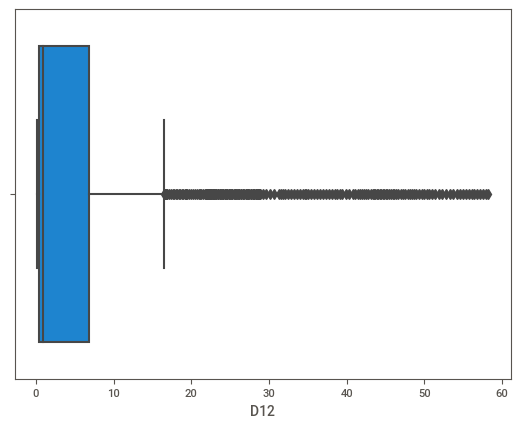

In [54]:
 #the box plot shows that there exists outliers in the dataset
import seaborn as sns
sns.boxplot(x=df_dropped['D12'])

We can see from the boxplot of the data that there exists outliers in all the columns of the dataset. The above code when run with different column features will show the existence of outliers


**We will perform the EDA of the dataset using the sweetviz library**


In [55]:
!pip install sweetviz

                                             |          | [  0%]   00:00 -> (? left)


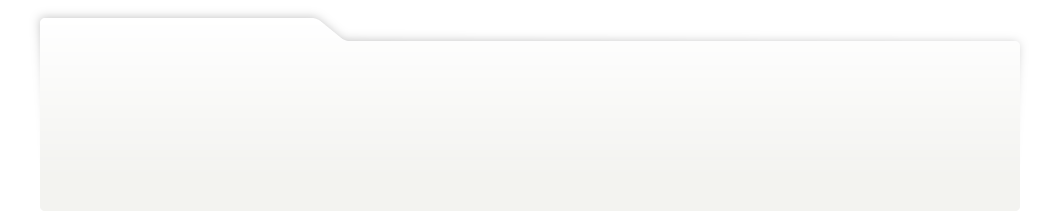
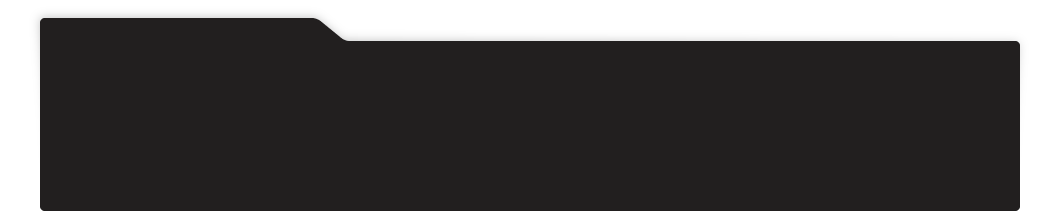
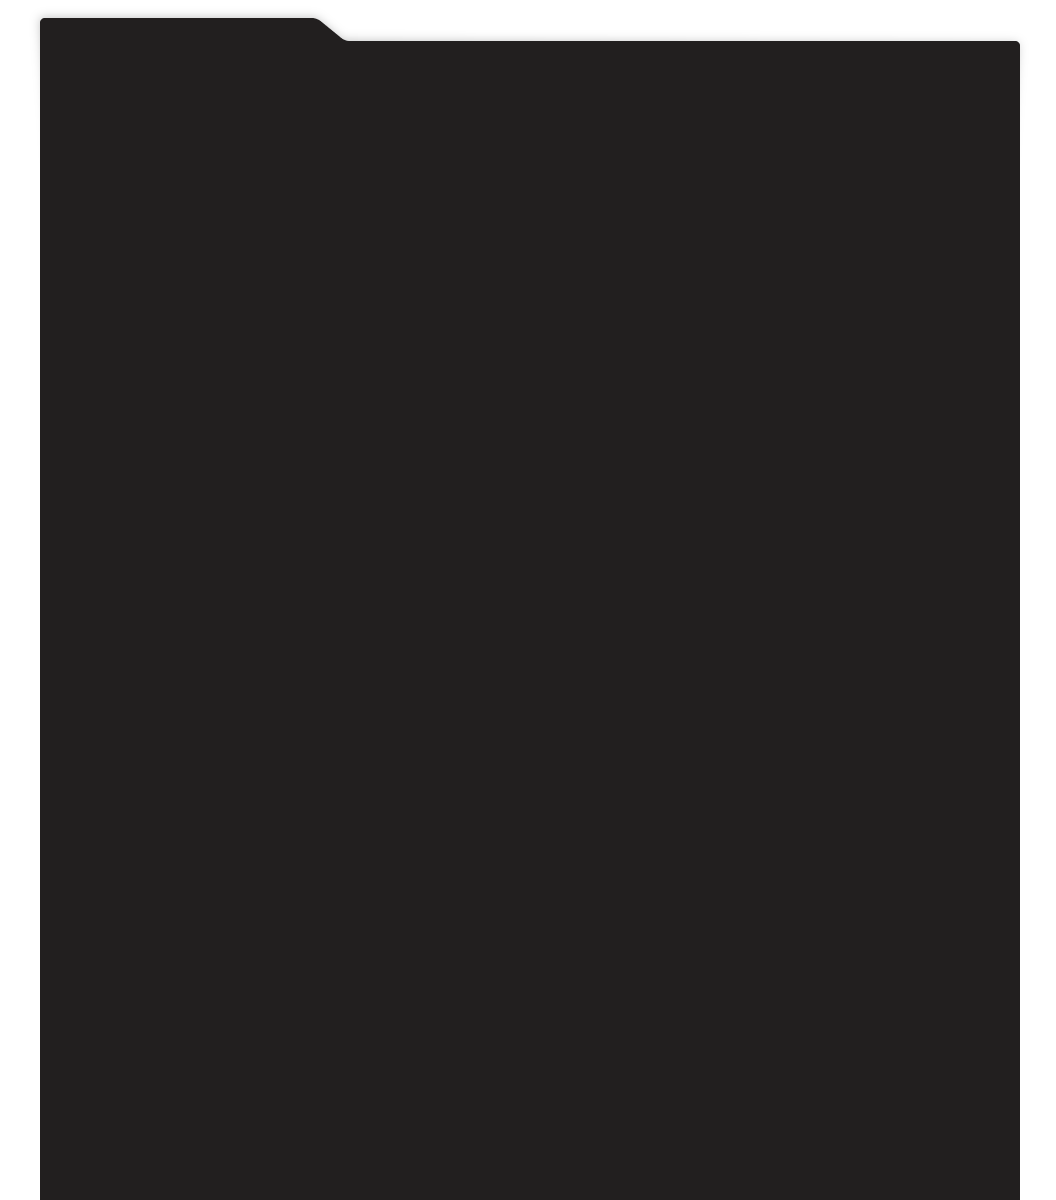
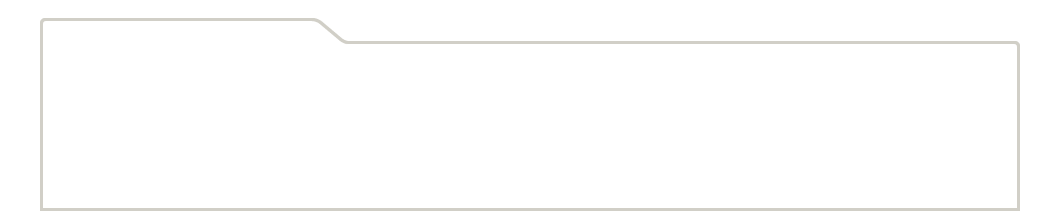
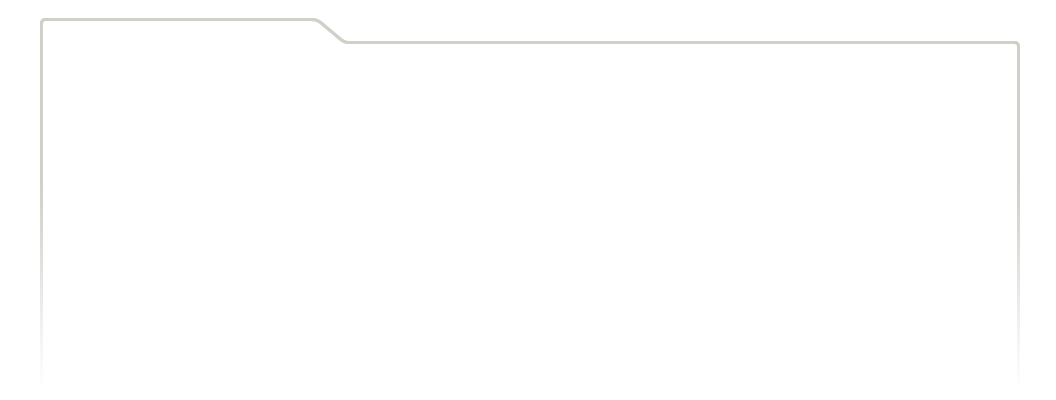
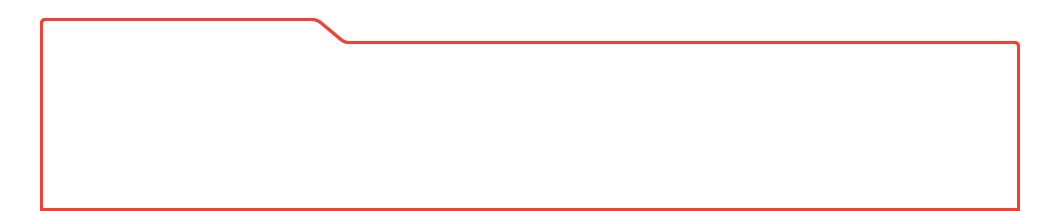
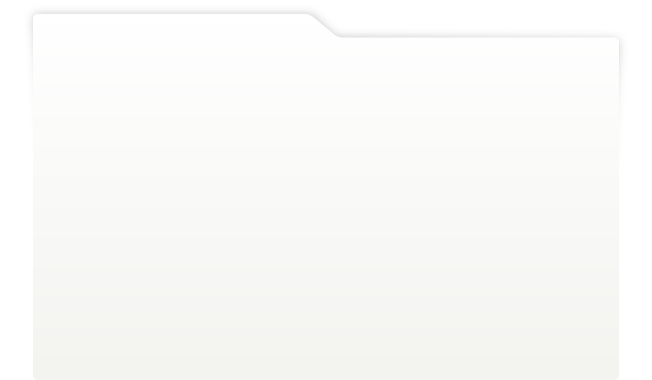
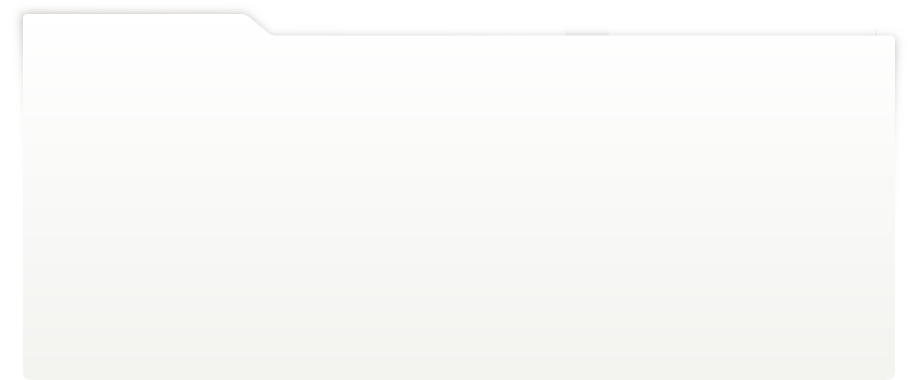
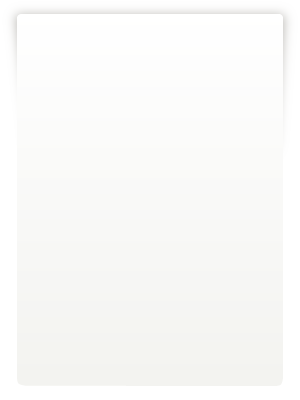
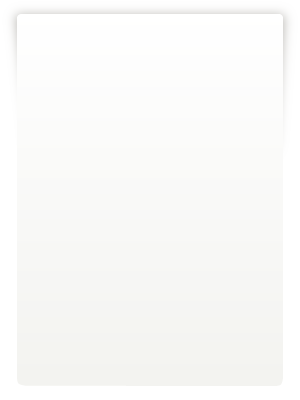
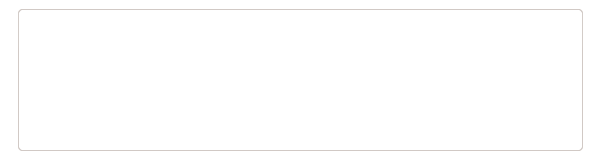
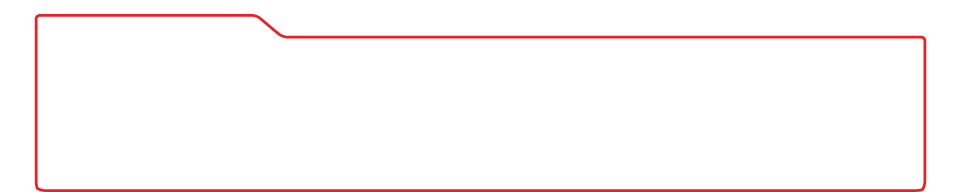
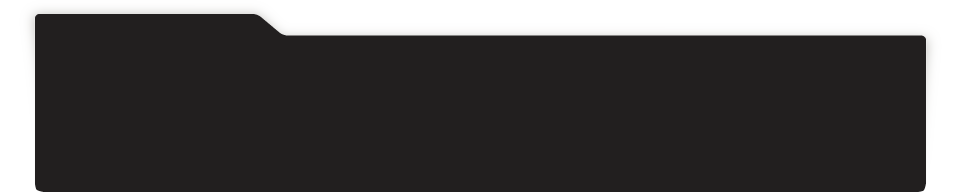
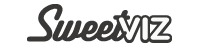
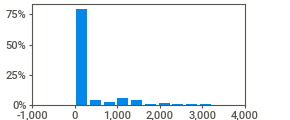
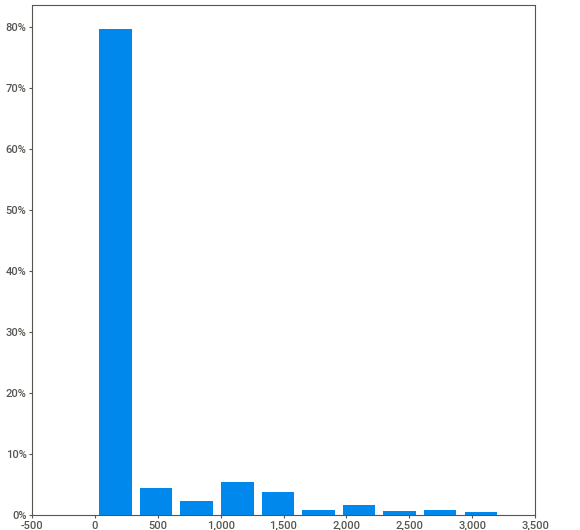
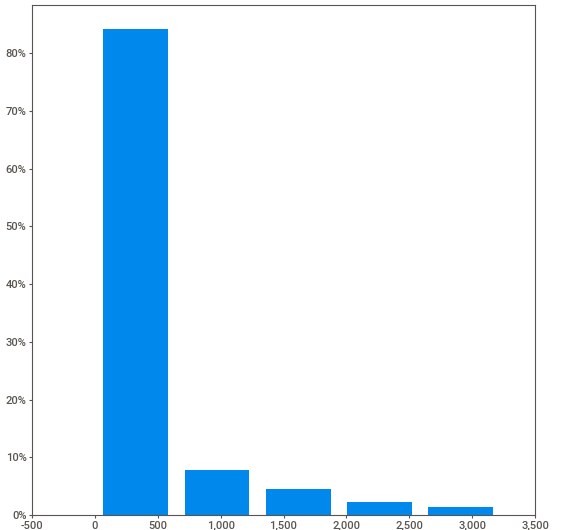
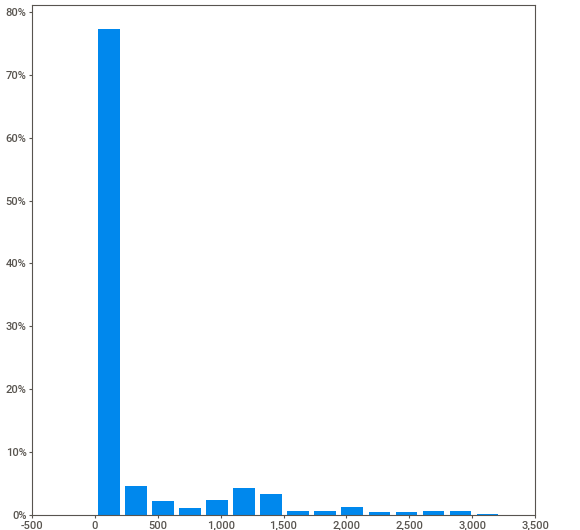
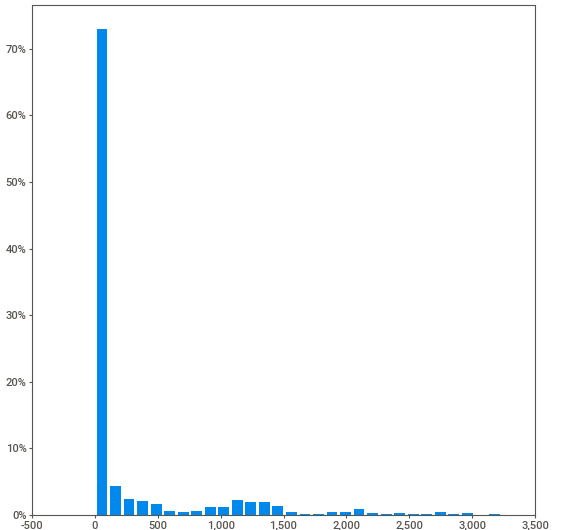
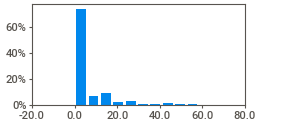
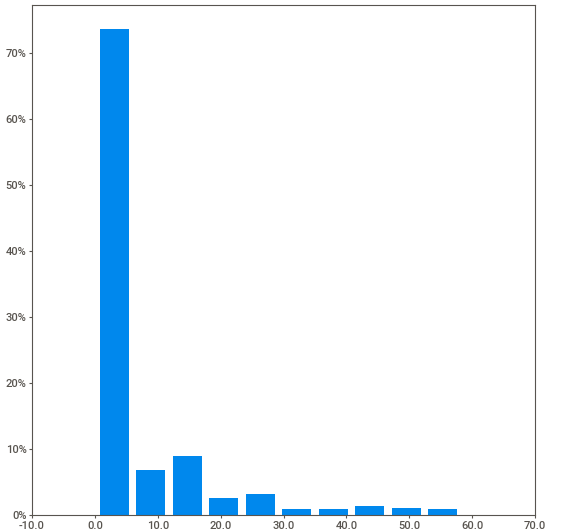
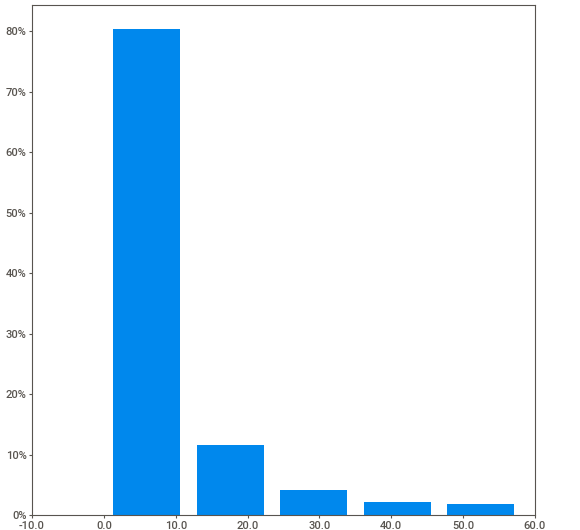
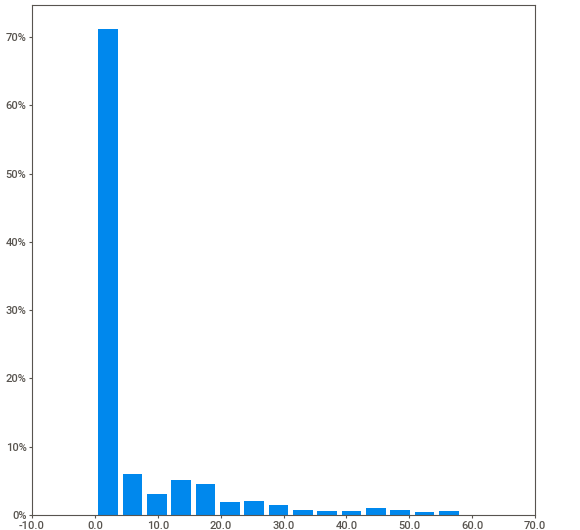
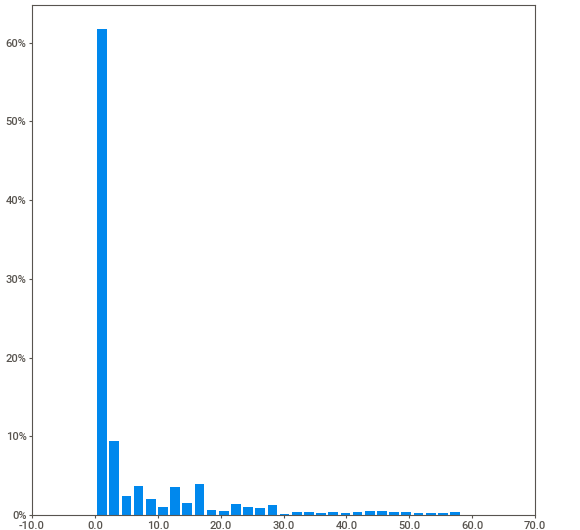
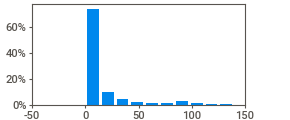
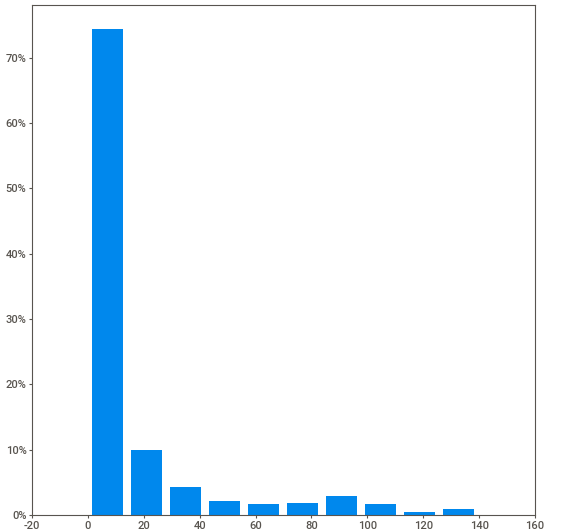
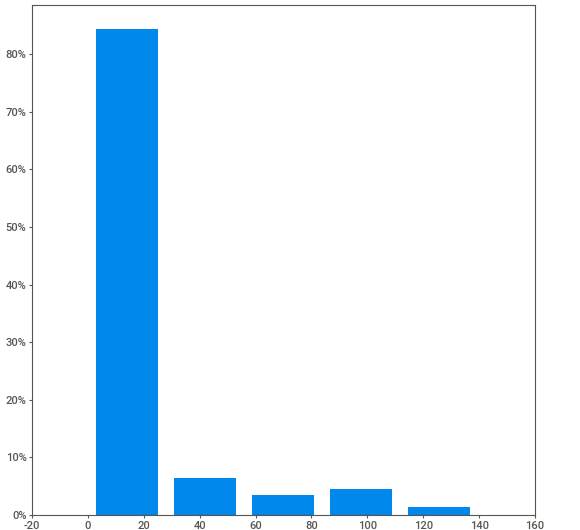
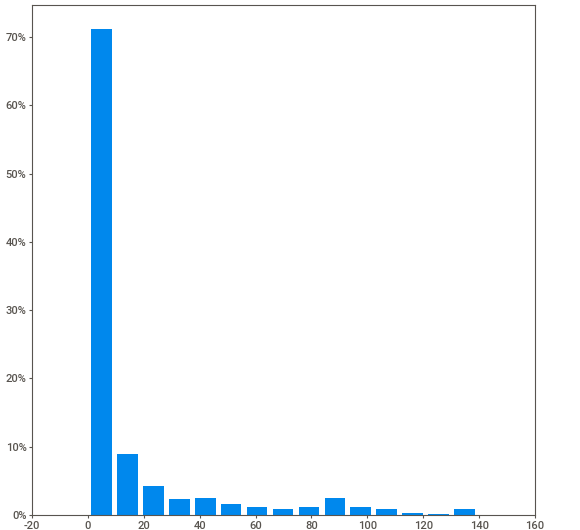
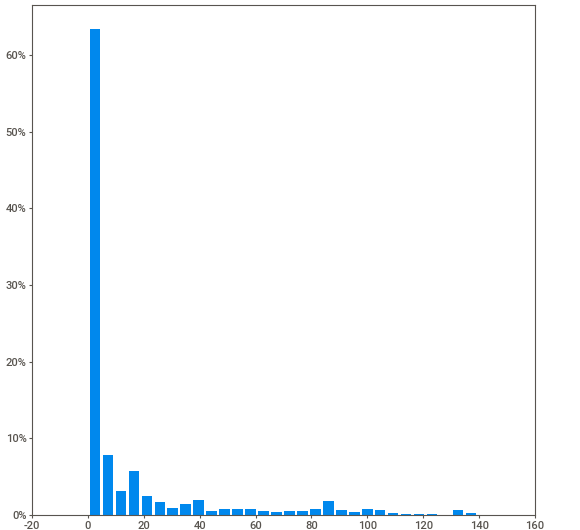
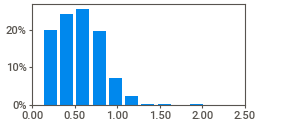
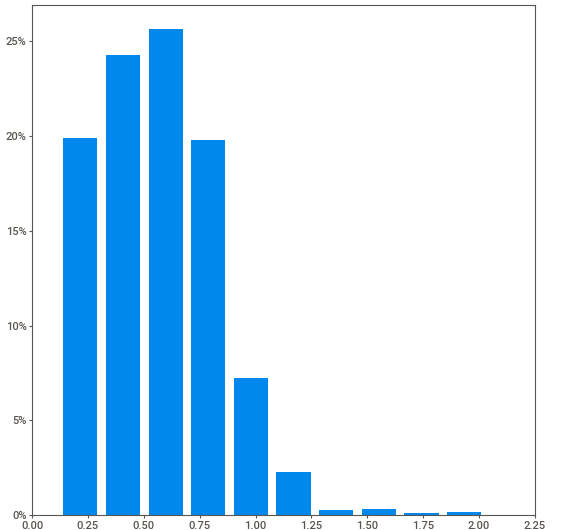
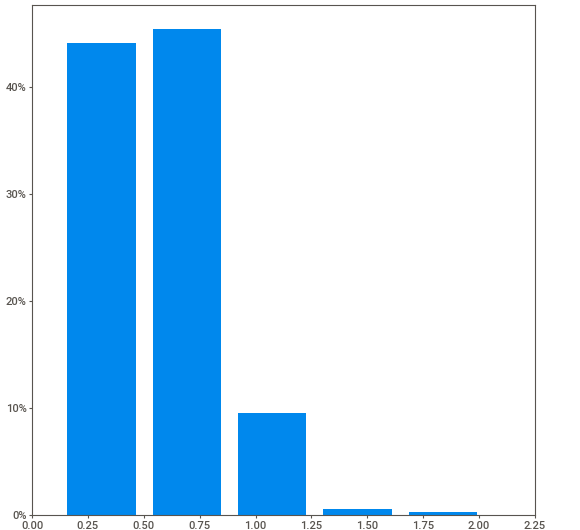
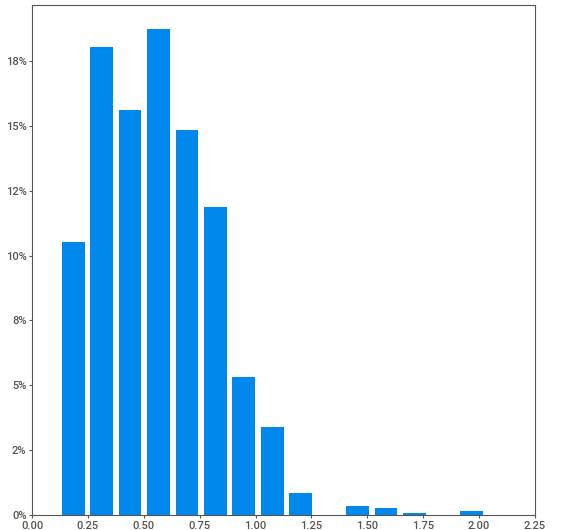
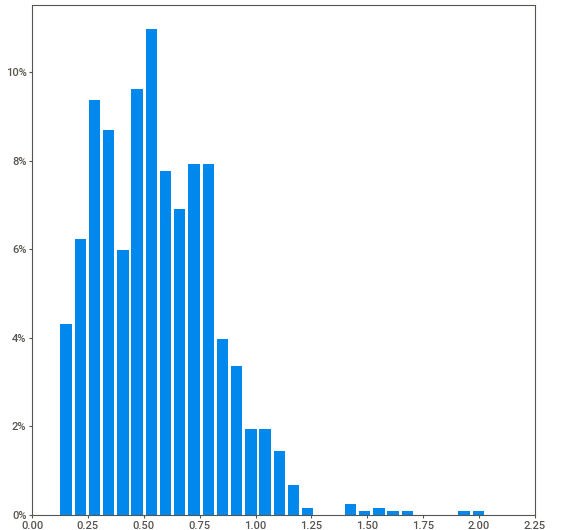
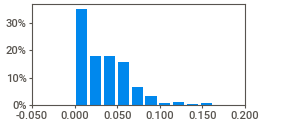
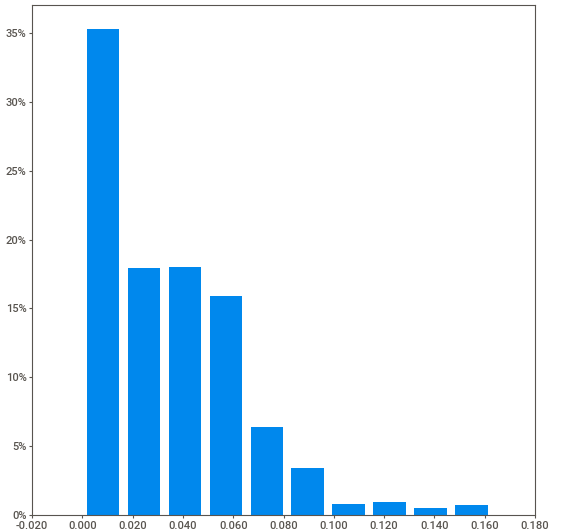
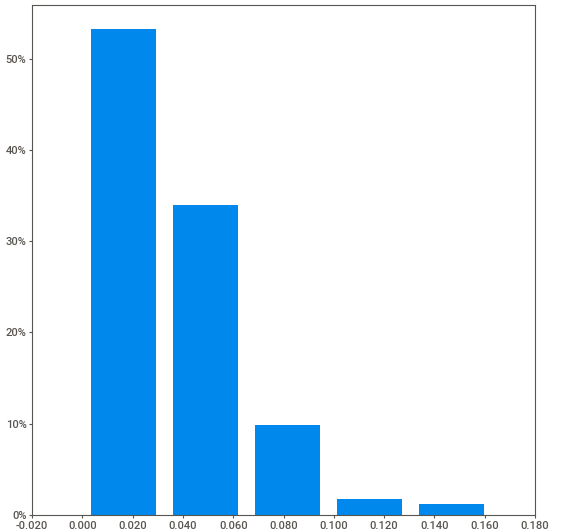
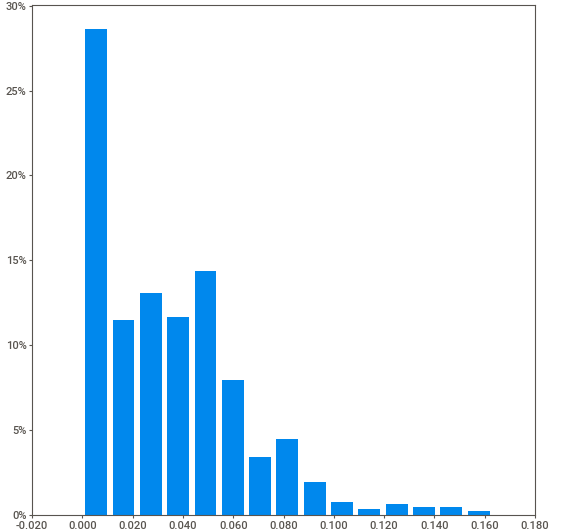
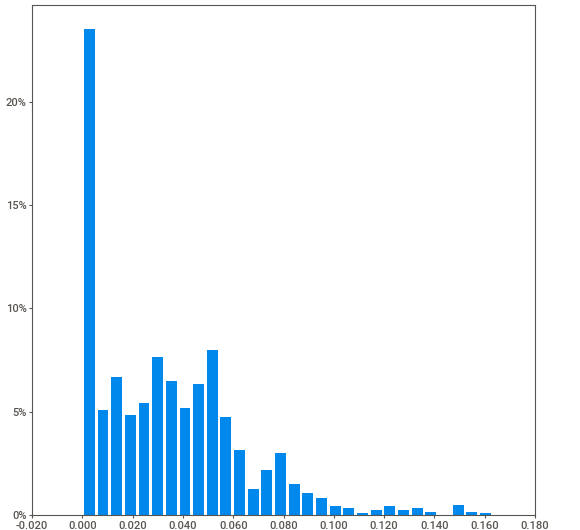
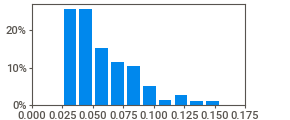
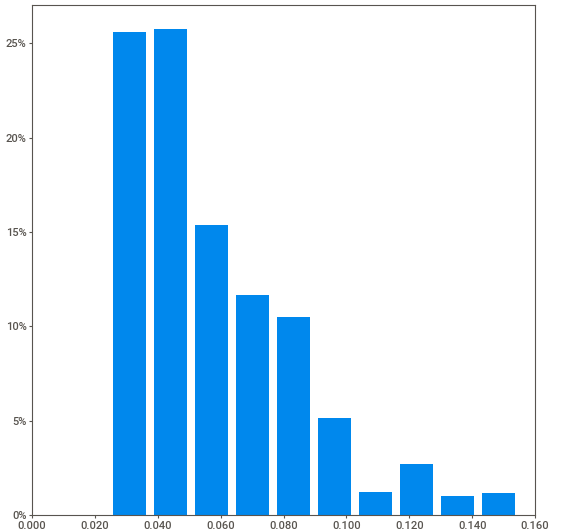
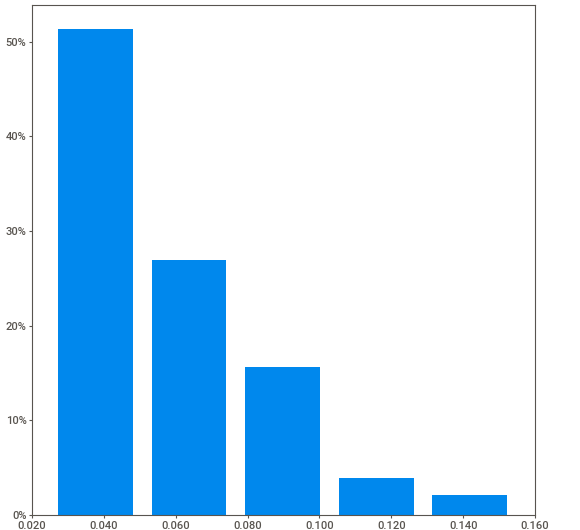
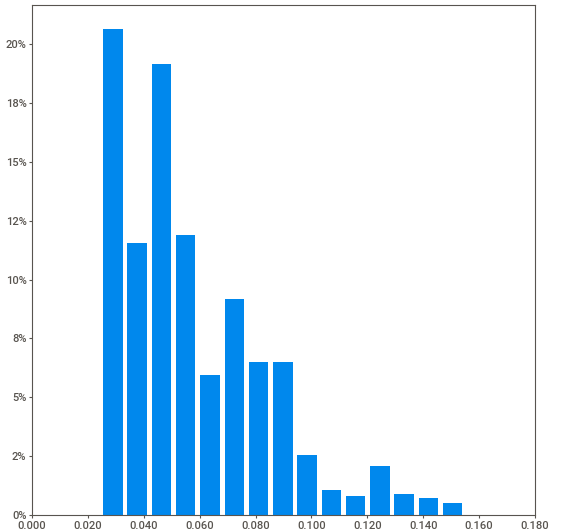
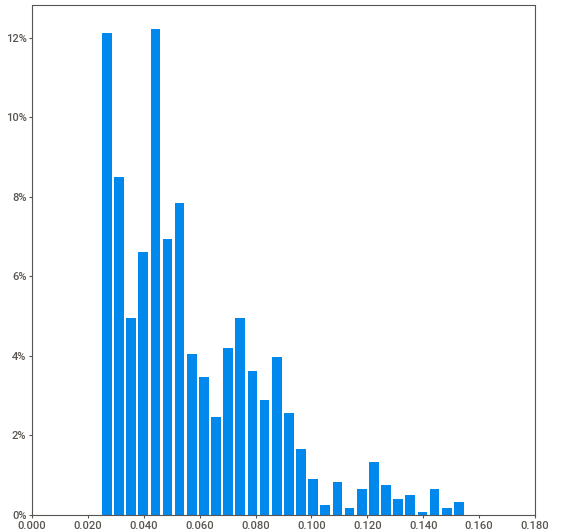
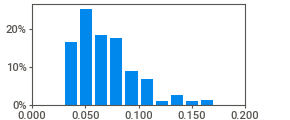
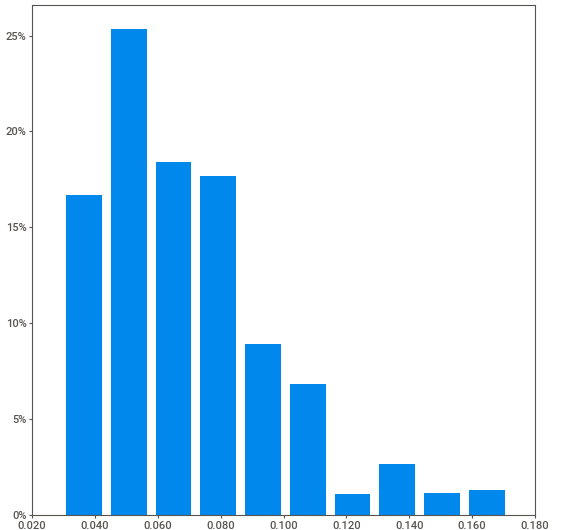
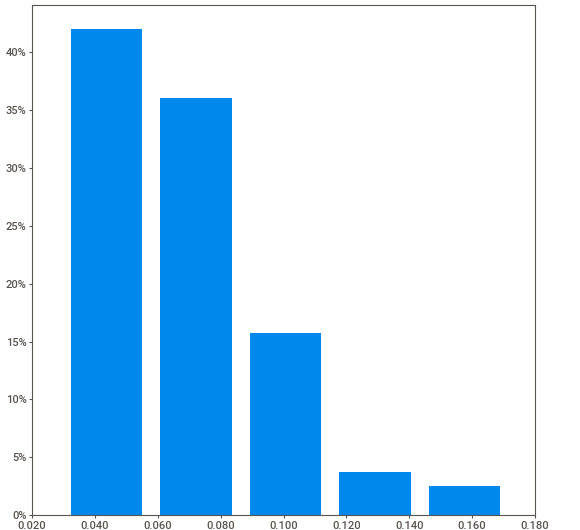
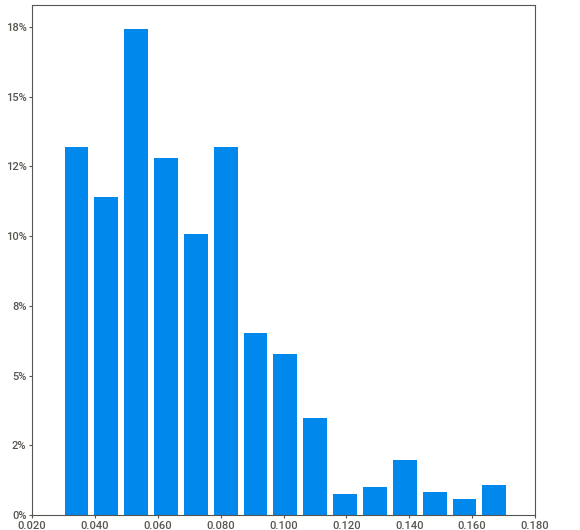
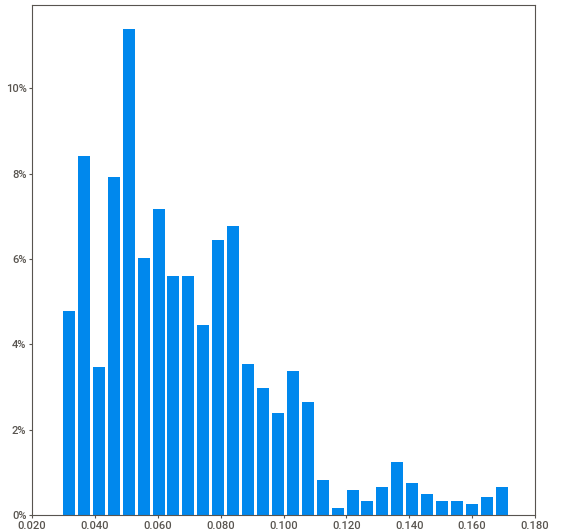
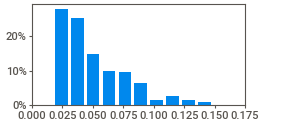
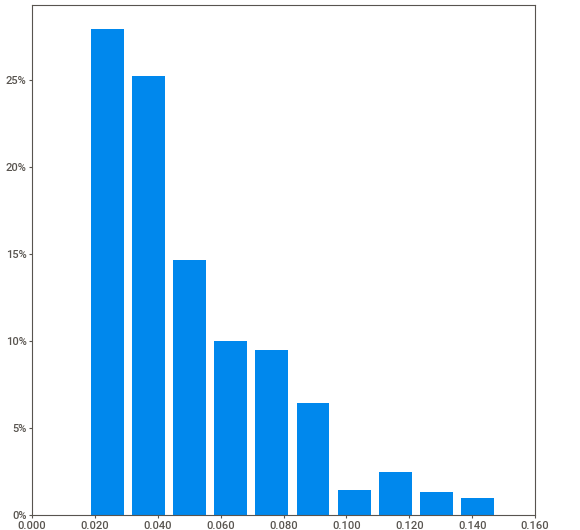
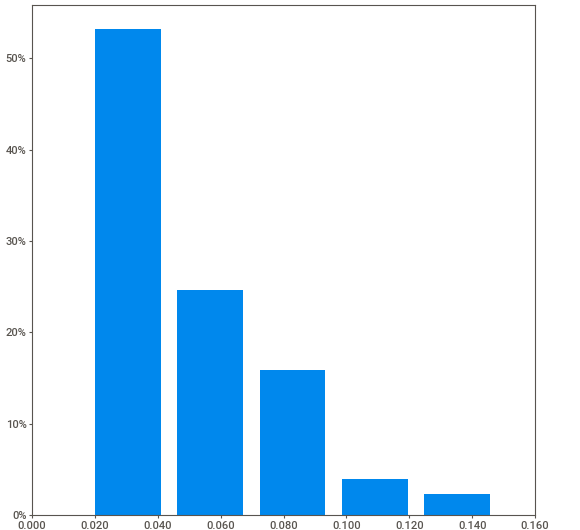
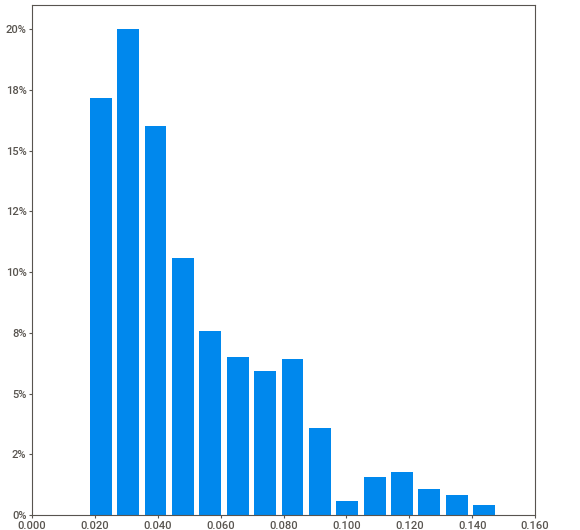
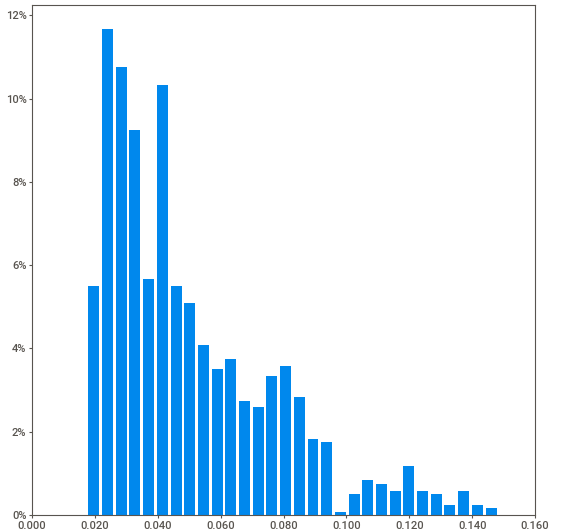
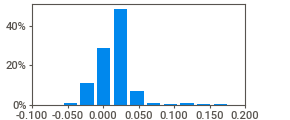
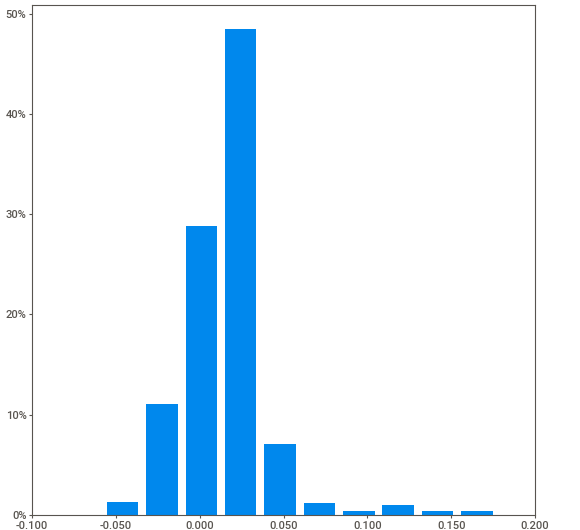
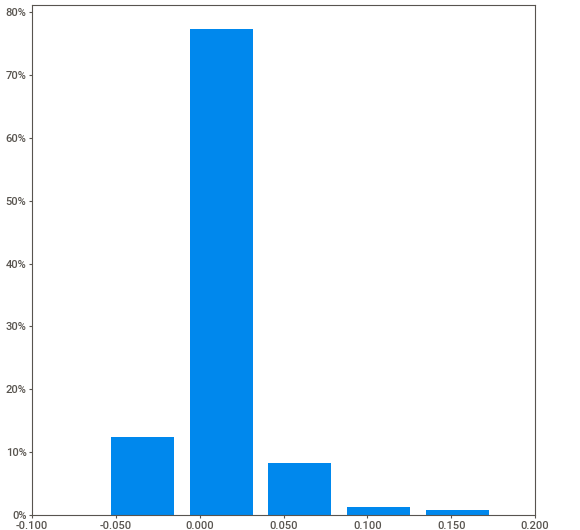
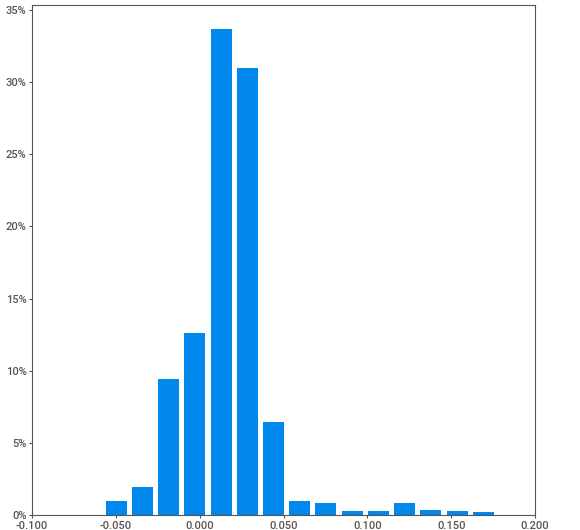
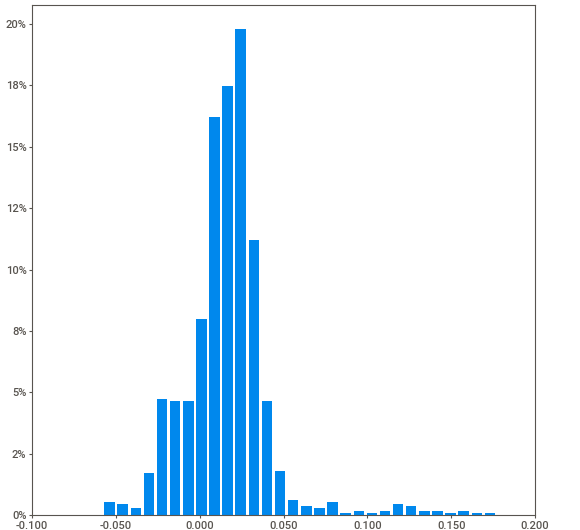
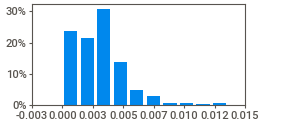
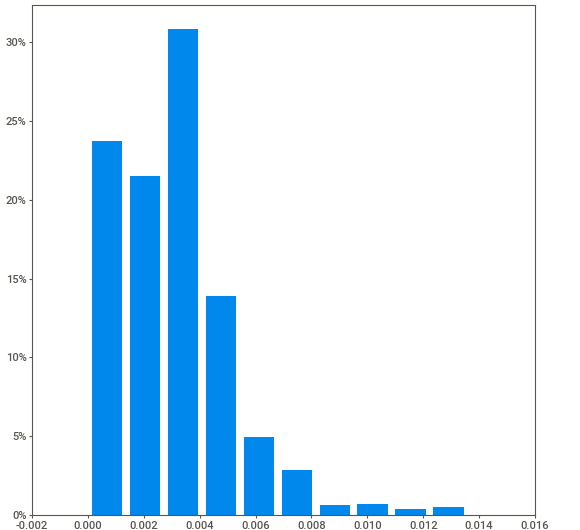
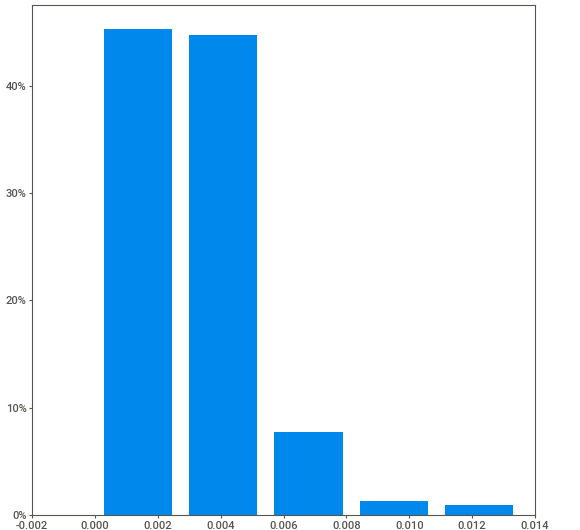
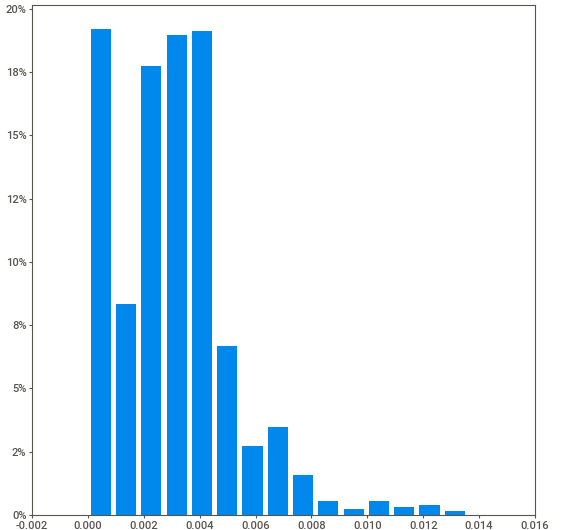
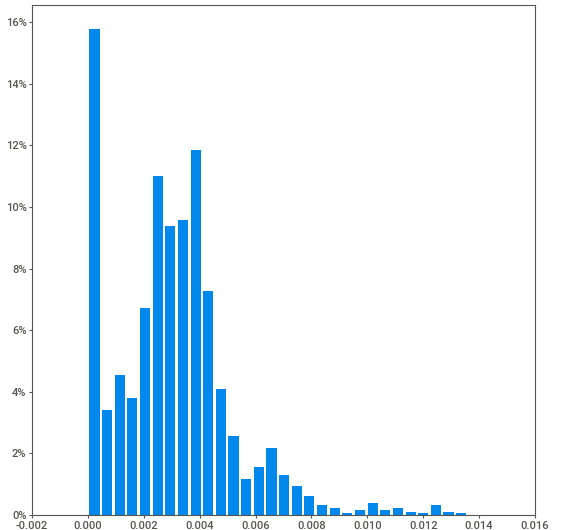
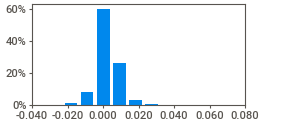
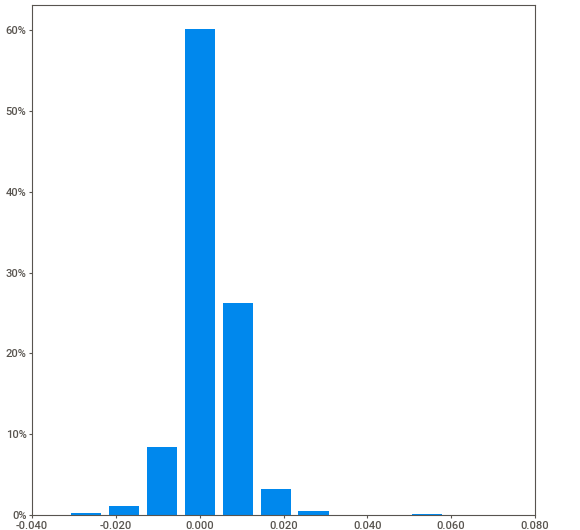
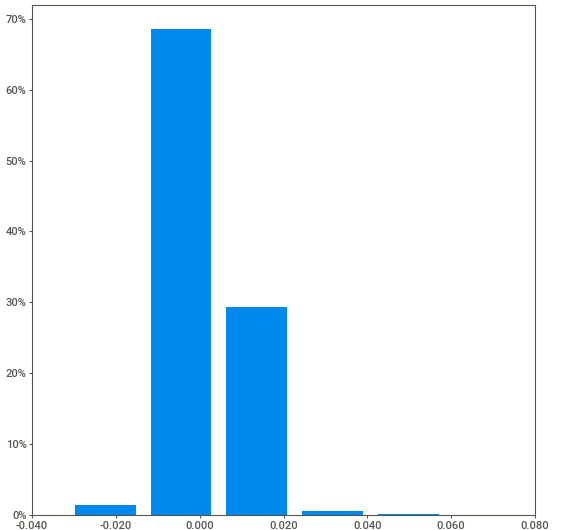
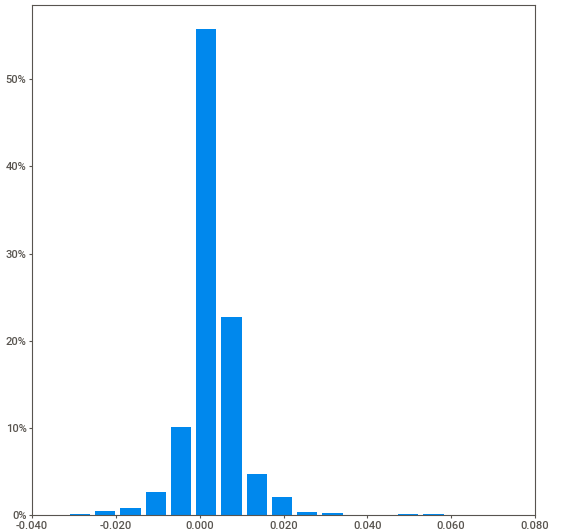
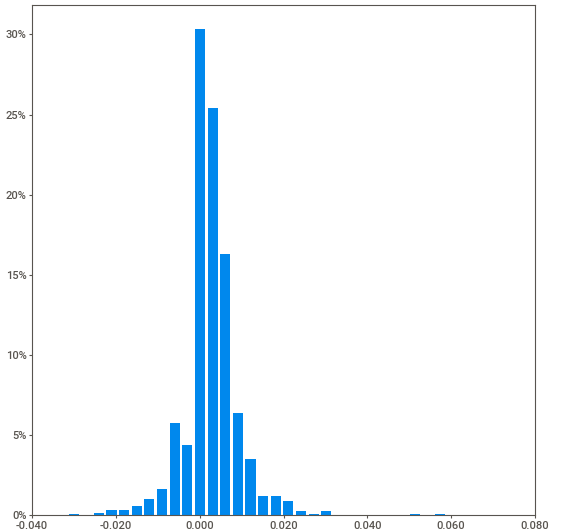
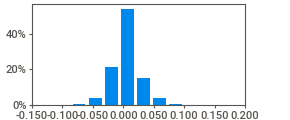
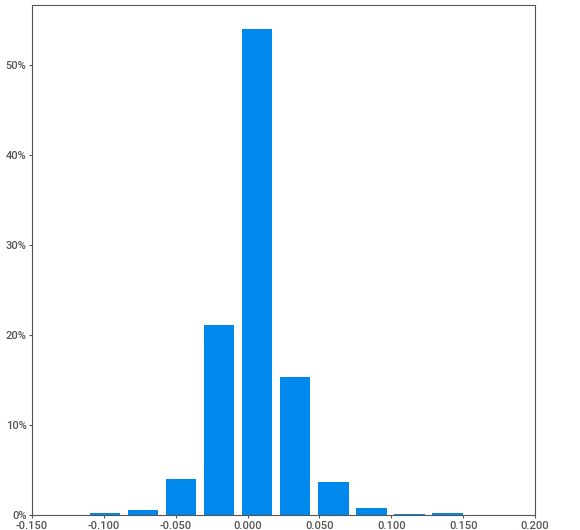
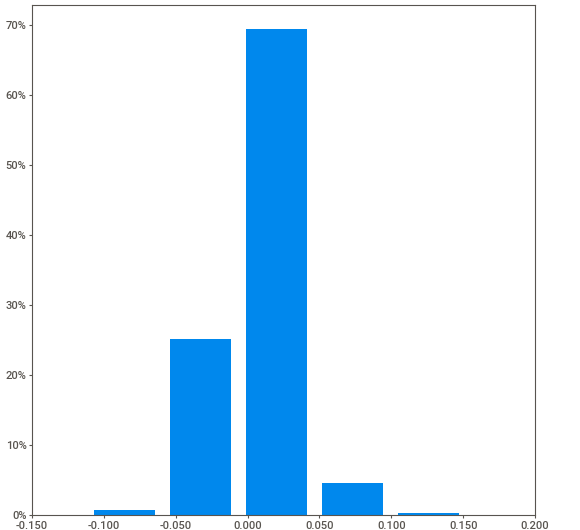
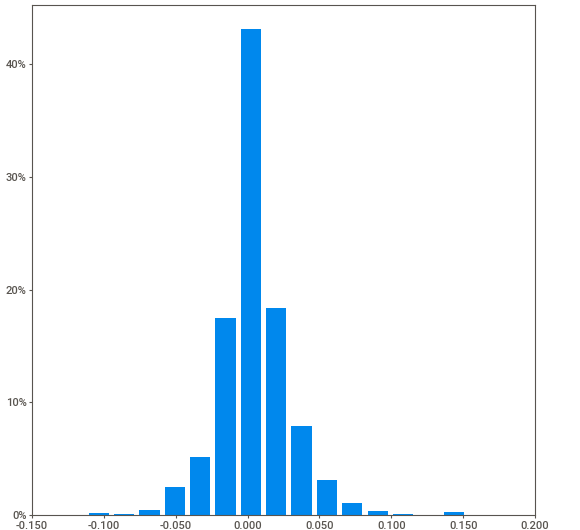
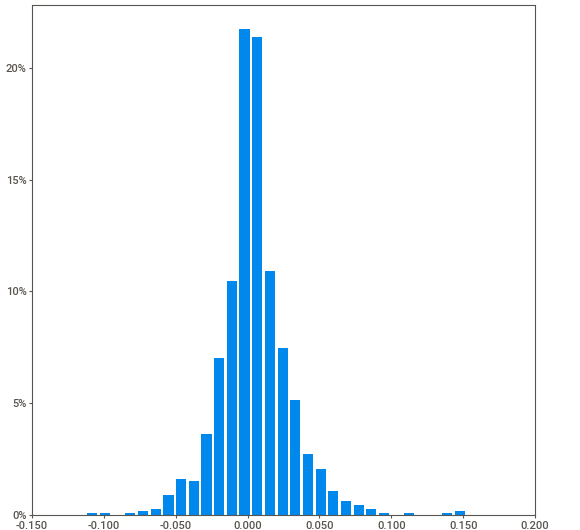
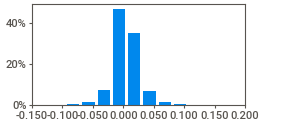
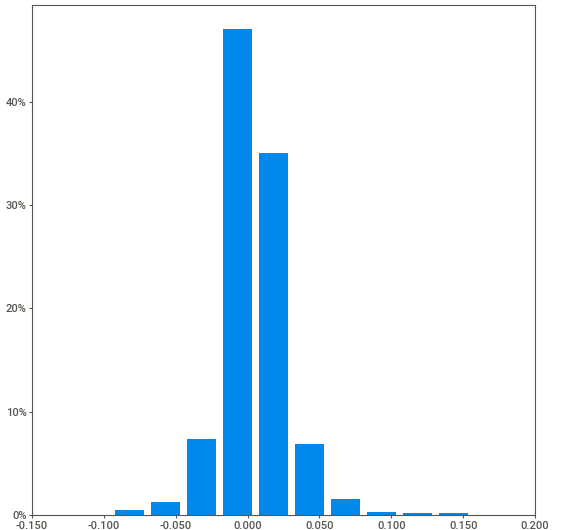
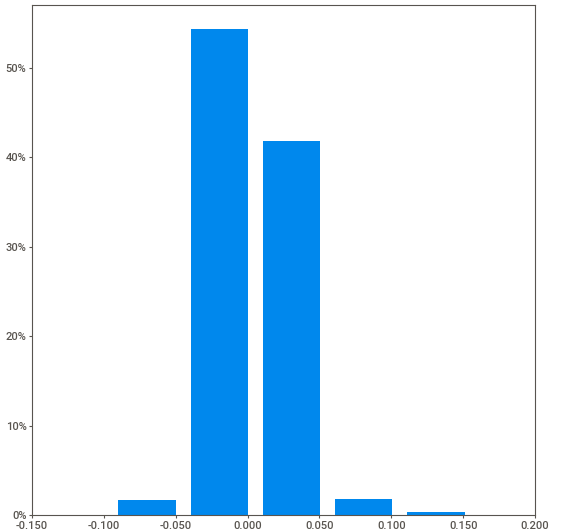
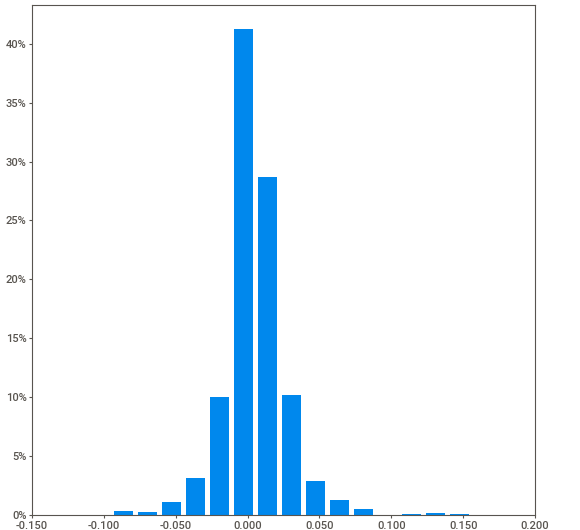
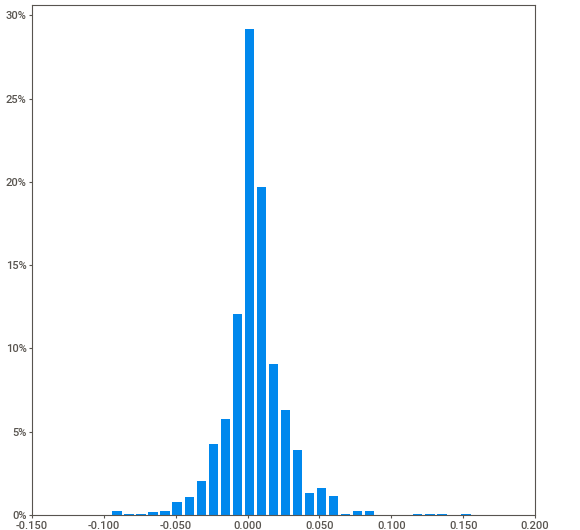
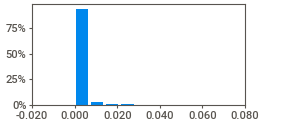
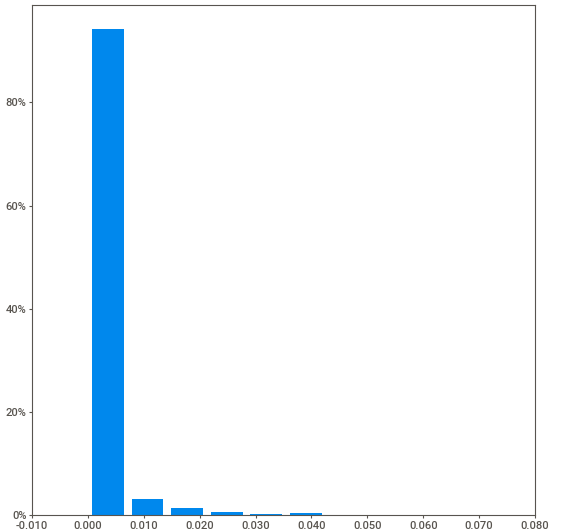
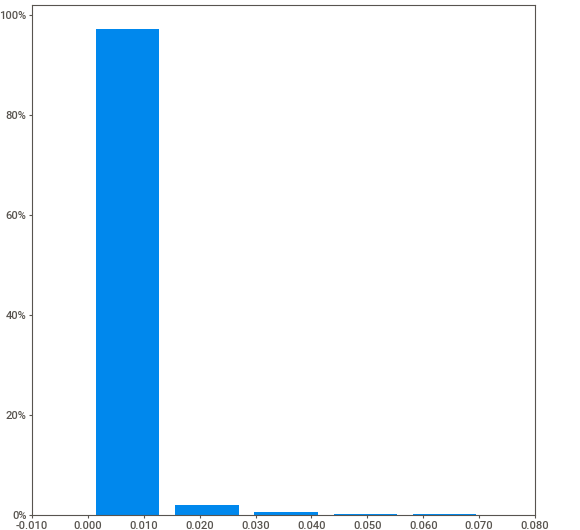
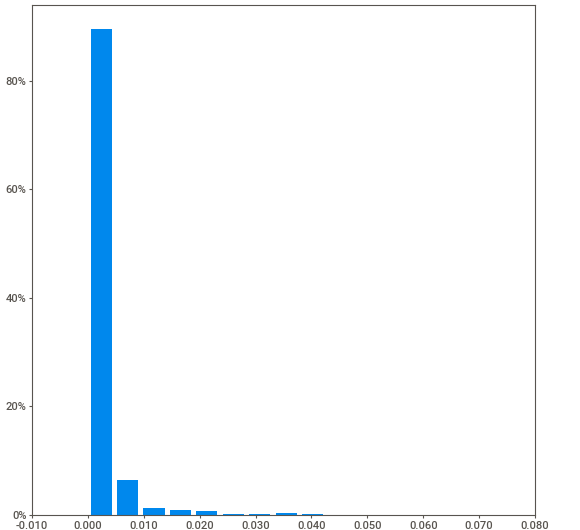
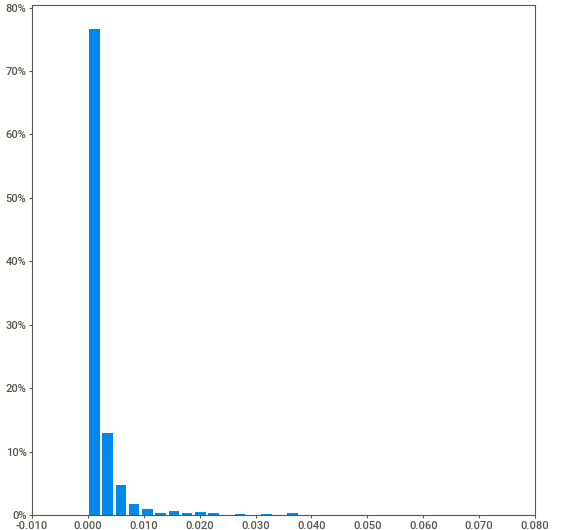
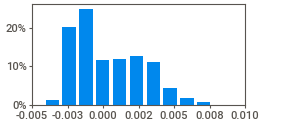
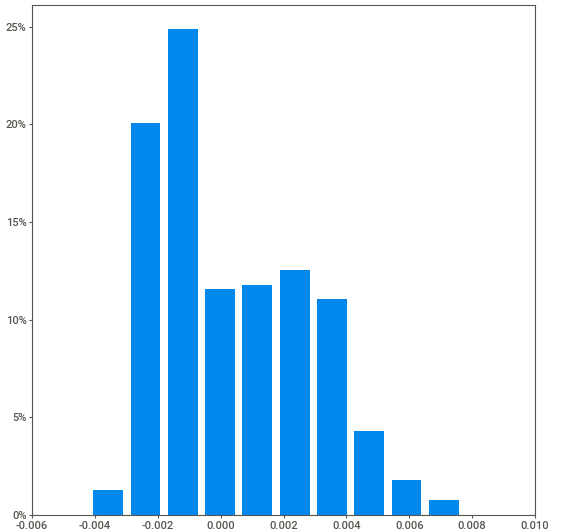
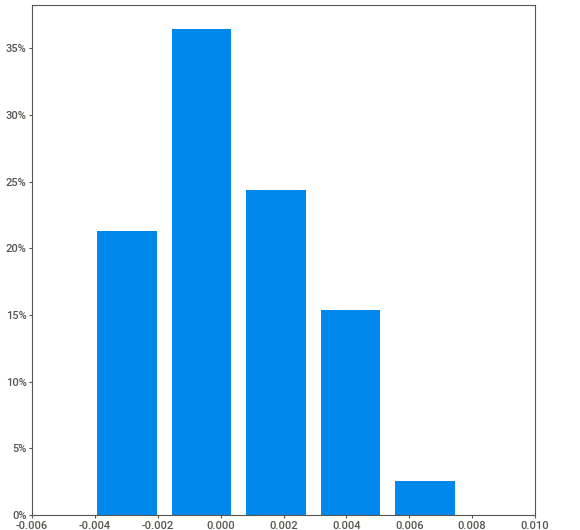
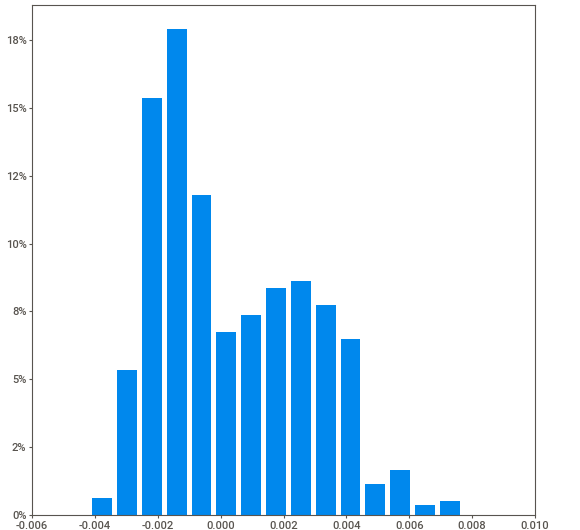
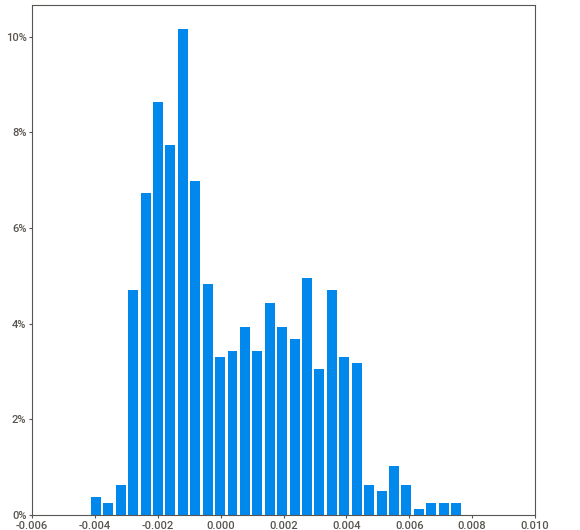
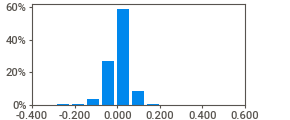
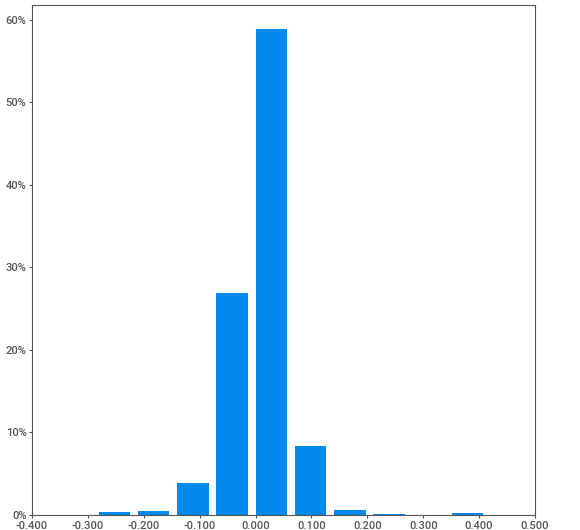
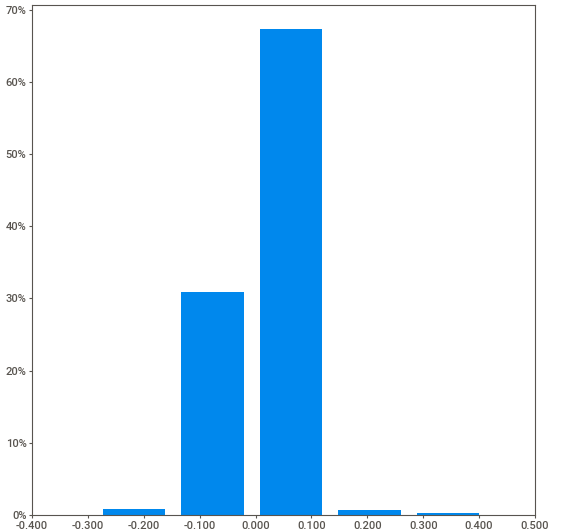
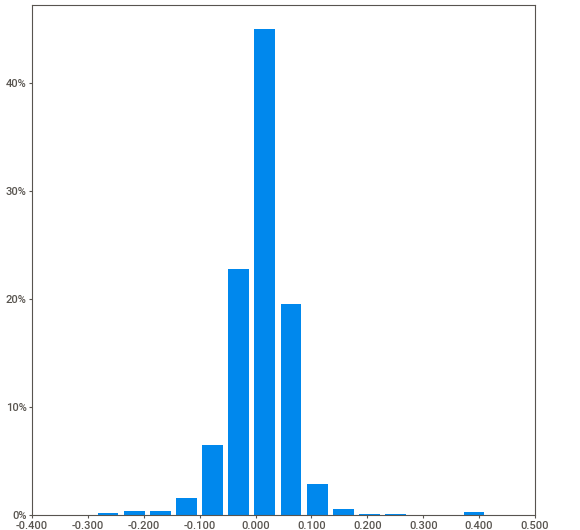
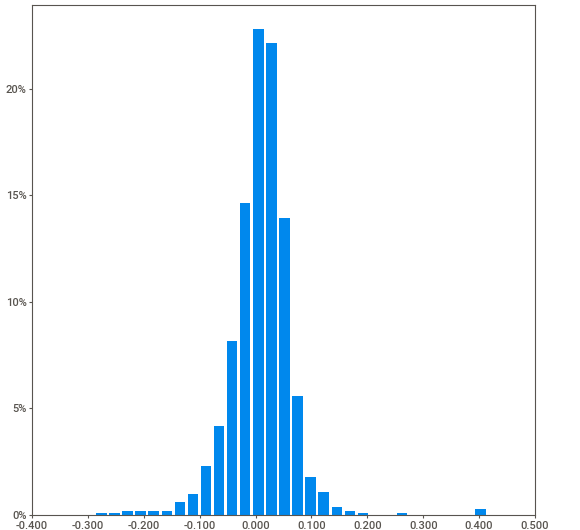
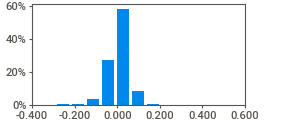
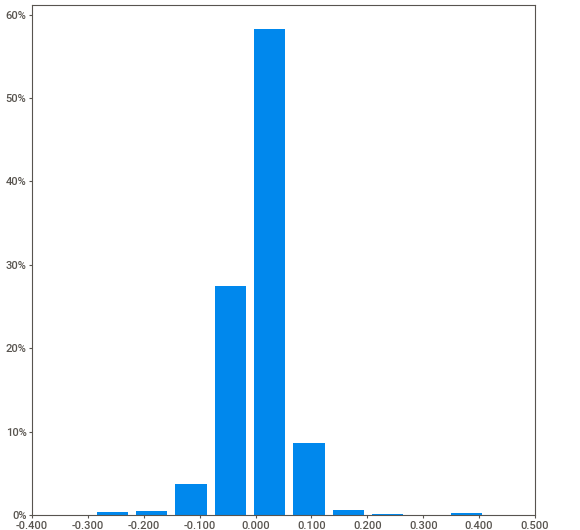
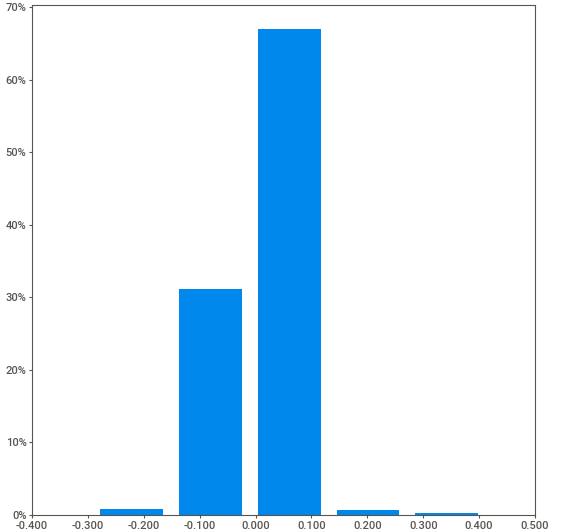
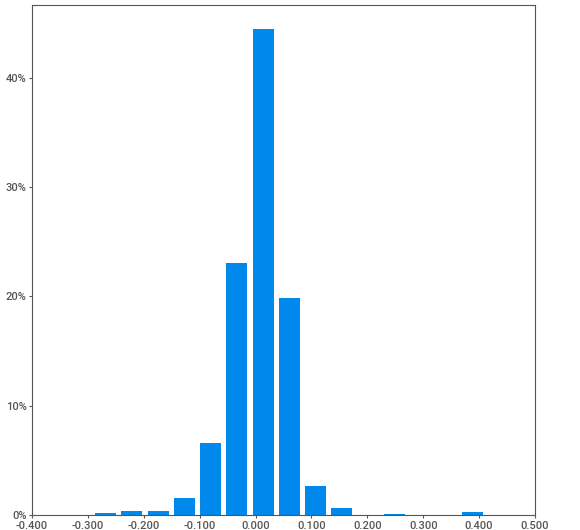
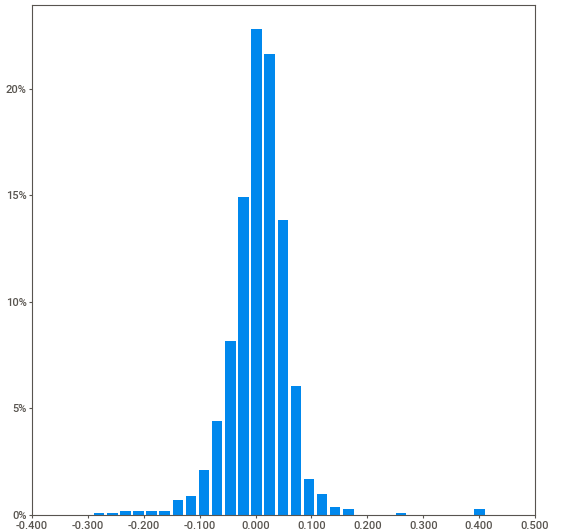
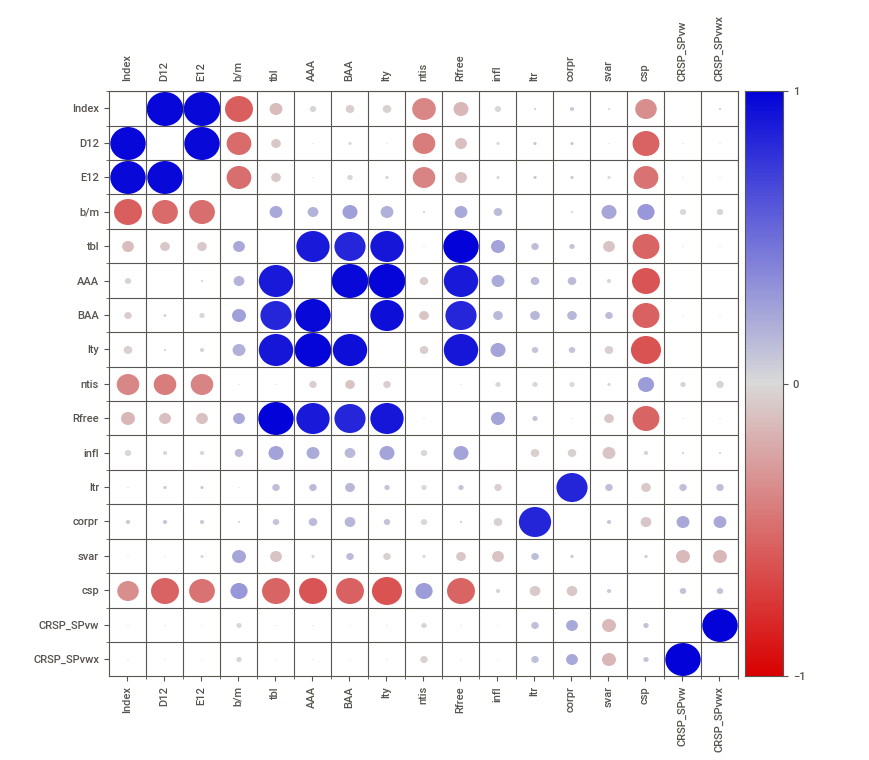
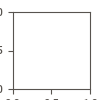

In [56]:
# EDA
import sweetviz as sv
SEED = 20201225
my_report = sv.analyze(df_dropped)
my_report.show_notebook()


We can see there are quite a few missing values in our dataset. After reading the paper we can find the dataset is missing for quite few date ranges in the beginnning b/m is measured from 1920 tbl - 1920 BAA/AAA - 1919 lty - 1919.... ntis - 1926 .... infl - 1919.... csp values are only available from 1937..
2002

So we could remove the datapoints before 1919 and for the other ranges that remains in front based on the percentage of values missing we could either fill them with -9999 which is outliers data and random Forest will deal with such values

But as pointed out by my college Nancy Xin Man we should preferably take datasets after 1945 since the datapoints before that wont show much of the trend of the data.

We can see the csp has still significant values which are missing we could compute the missing values using imputers like mean imputers but since the portion is almost 35% we could rather drop it and then the remaining missing values we could either fill those values -99999 so that our RF will take such values outliers or alltogether remove the column for now.... while the rest we will fill the values as -99999

Should the outliers be removed ? Since there are some assumptions of how RF are not sensitive to outliers https://stats.stackexchange.com/questions/187200/how-are-random-forests-not-sensitive-tooutliers#:~:text=However%2C%20two%20pieces%20of%20intuition,they%20were%20selected%20during%20boosting


In [57]:
df_dropped.drop(['csp'], inplace=True, axis=1)
df_dropped.head()

Index   D12  E12  b/m  tbl  AAA  BAA  lty  ntis     Rfree  infl  \
yyyymm                                                                        
1871-01-01   4.44  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004967   NaN   
1871-02-01   4.50  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004525   NaN   
1871-03-01   4.61  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004252   NaN   
1871-04-01   4.74  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004643   NaN   
1871-05-01   4.86  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.003698   NaN   

            ltr  corpr  svar  CRSP_SPvw  CRSP_SPvwx  
yyyymm                                               
1871-01-01  NaN    NaN   NaN        NaN         NaN  
1871-02-01  NaN    NaN   NaN        NaN         NaN  
1871-03-01  NaN    NaN   NaN        NaN         NaN  
1871-04-01  NaN    NaN   NaN        NaN         NaN  
1871-05-01  NaN    NaN   NaN        NaN         NaN

In [58]:
# This dataset consists data from 1919 range which is the earliest when the infl rate were calculated while the other
# columns have data measurement rangin from 1919-1926 which we could fill with -99999 thus the Random Forest will take
# them as outliers.

import datetime
df_processed = df_dropped.loc[datetime.datetime(1945, 1, 1):,:]
df_processed.head()

Index       D12       E12       b/m     tbl     AAA     BAA  \
yyyymm                                                                    
1945-01-01  13.47  0.643333  0.940000  0.735342  0.0038  0.0269  0.0346   
1945-02-01  14.30  0.646667  0.950000  0.704489  0.0038  0.0265  0.0341   
1945-03-01  13.64  0.650000  0.960000  0.767883  0.0038  0.0262  0.0338   
1945-04-01  14.84  0.650000  0.973333  0.715063  0.0038  0.0261  0.0336   
1945-05-01  15.01  0.650000  0.986667  0.702911  0.0038  0.0262  0.0332   

               lty      ntis     Rfree      infl     ltr   corpr      svar  \
yyyymm                                                                       
1945-01-01  0.0240  0.016454  0.000317  0.000000  0.0127  0.0076  0.000924   
1945-02-01  0.0236  0.014836  0.000317  0.000000  0.0077  0.0046  0.000655   
1945-03-01  0.0236  0.015963  0.000317  0.000000  0.0021  0.0018  0.001887   
1945-04-01  0.0228  0.015086  0.000317  0.000000  0.0160  0.0018  0.001398   
1945-05-01  0.0226  0.019773  0.000317  0.005618  0.0056 -0.0011  0.000921   

            CRSP_SPvw  CRSP_SPvwx  
yyyymm                             
1945-01-01   0.011901    0.010784  
1945-02-01   0.069472    0.063578  
1945-03-01  -0.041685   -0.044990  
1945-04-01   0.090524    0.089465  
1945-05-01   0.020041    0.011624

In [59]:
for i in df_processed.columns:
  # count number of rows with missing values
  n_miss = df_dropped.loc[datetime.datetime(1945, 1, 1):,:][i].isnull().sum()
  perc = n_miss / df_dropped.loc[datetime.datetime(1945, 1, 1):,:].shape[0] * 100
  print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))


> Index, Missing: 0 (0.0%)
> D12, Missing: 0 (0.0%)
> E12, Missing: 0 (0.0%)
> b/m, Missing: 0 (0.0%)
> tbl, Missing: 0 (0.0%)
> AAA, Missing: 0 (0.0%)
> BAA, Missing: 0 (0.0%)
> lty, Missing: 12 (1.3%)
> ntis, Missing: 0 (0.0%)
> Rfree, Missing: 0 (0.0%)
> infl, Missing: 0 (0.0%)
> ltr, Missing: 0 (0.0%)
> corpr, Missing: 0 (0.0%)
> svar, Missing: 0 (0.0%)
> CRSP_SPvw, Missing: 0 (0.0%)
> CRSP_SPvwx, Missing: 0 (0.0%)


In [60]:
df_processed.head()

Index       D12       E12       b/m     tbl     AAA     BAA  \
yyyymm                                                                    
1945-01-01  13.47  0.643333  0.940000  0.735342  0.0038  0.0269  0.0346   
1945-02-01  14.30  0.646667  0.950000  0.704489  0.0038  0.0265  0.0341   
1945-03-01  13.64  0.650000  0.960000  0.767883  0.0038  0.0262  0.0338   
1945-04-01  14.84  0.650000  0.973333  0.715063  0.0038  0.0261  0.0336   
1945-05-01  15.01  0.650000  0.986667  0.702911  0.0038  0.0262  0.0332   

               lty      ntis     Rfree      infl     ltr   corpr      svar  \
yyyymm                                                                       
1945-01-01  0.0240  0.016454  0.000317  0.000000  0.0127  0.0076  0.000924   
1945-02-01  0.0236  0.014836  0.000317  0.000000  0.0077  0.0046  0.000655   
1945-03-01  0.0236  0.015963  0.000317  0.000000  0.0021  0.0018  0.001887   
1945-04-01  0.0228  0.015086  0.000317  0.000000  0.0160  0.0018  0.001398   
1945-05-01  0.0226  0.019773  0.000317  0.005618  0.0056 -0.0011  0.000921   

            CRSP_SPvw  CRSP_SPvwx  
yyyymm                             
1945-01-01   0.011901    0.010784  
1945-02-01   0.069472    0.063578  
1945-03-01  -0.041685   -0.044990  
1945-04-01   0.090524    0.089465  
1945-05-01   0.020041    0.011624

                                             |          | [  0%]   00:00 -> (? left)


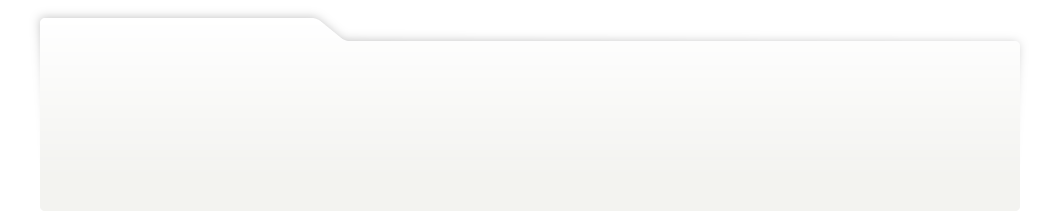
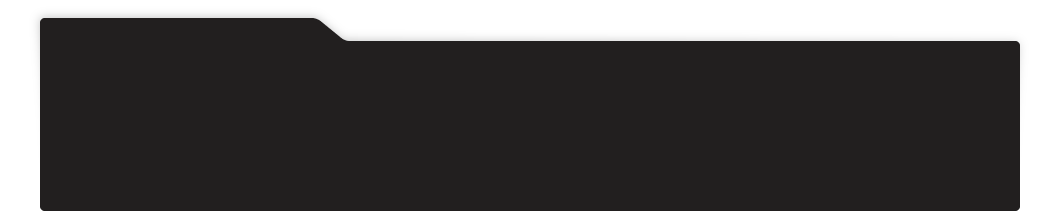
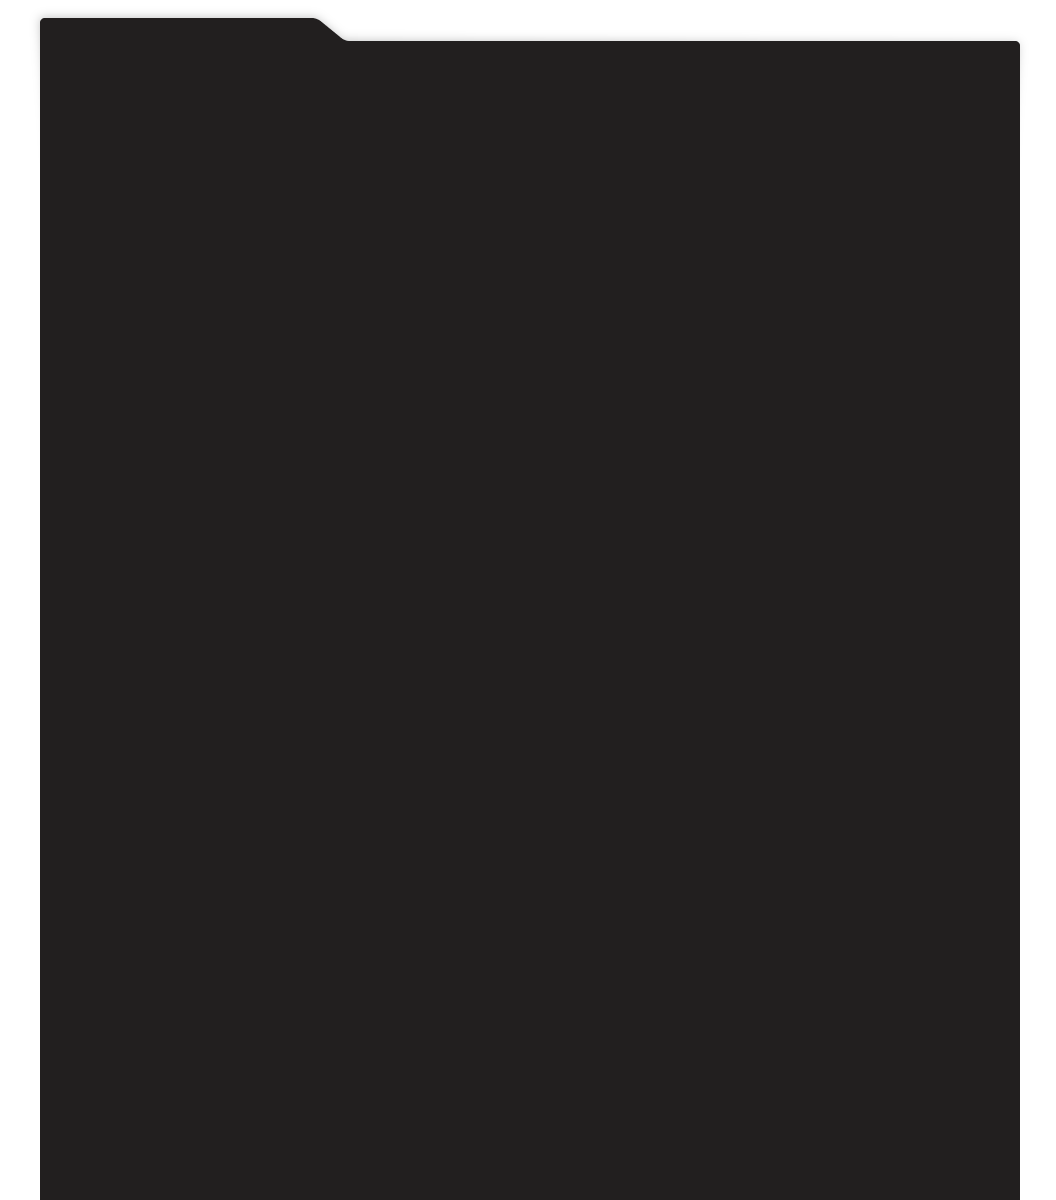
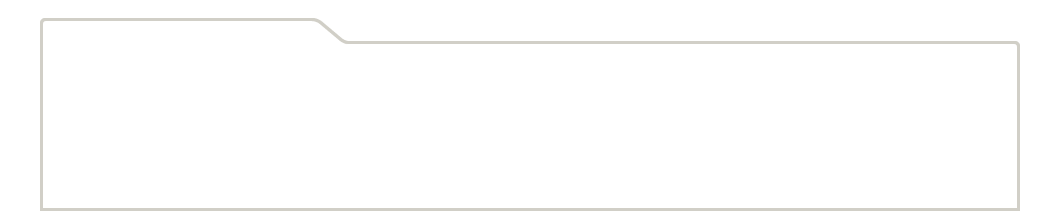
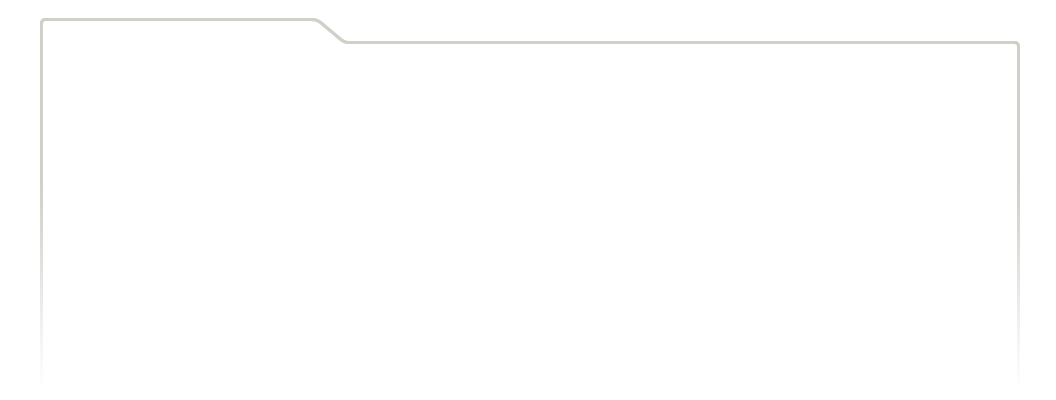
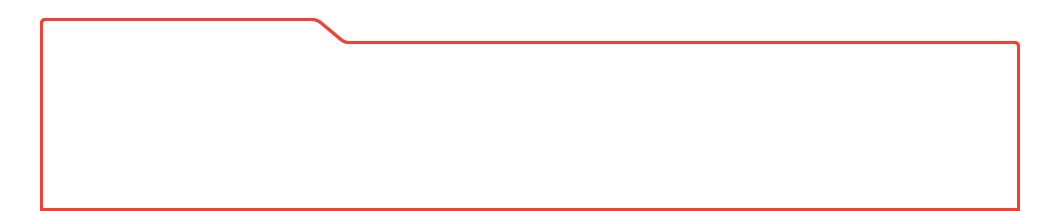
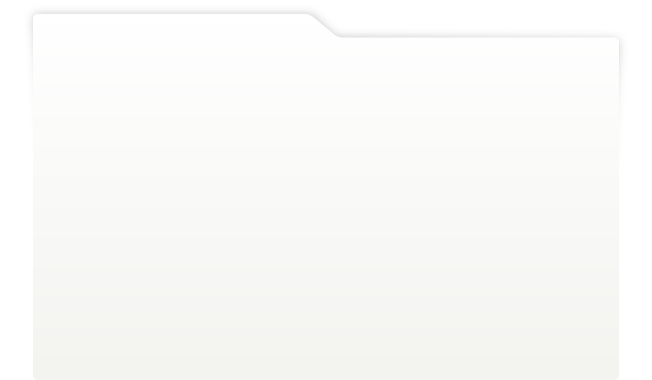
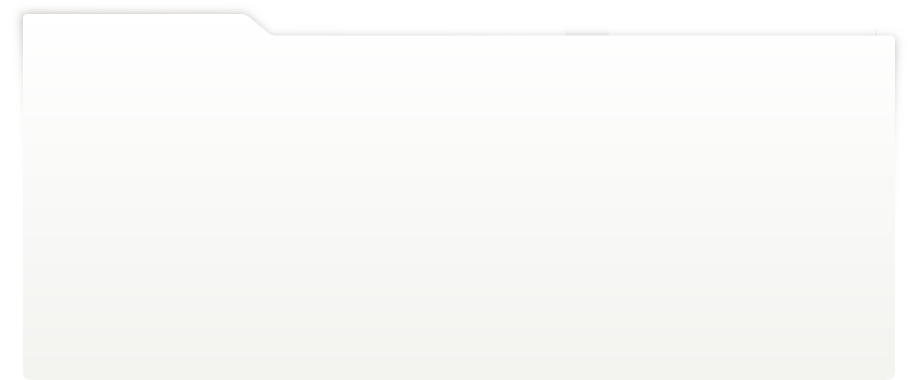
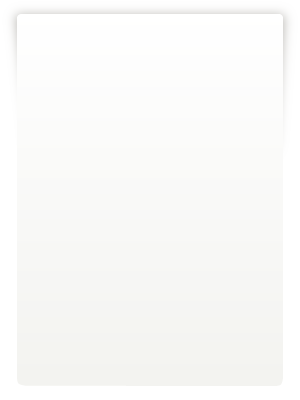
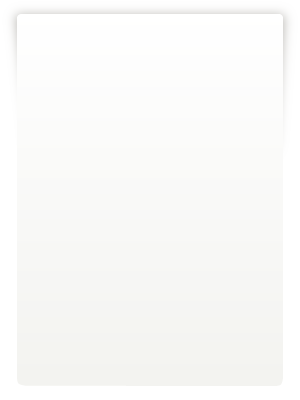
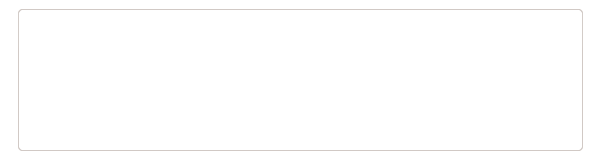
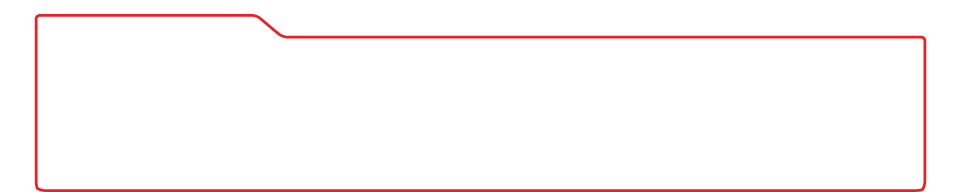
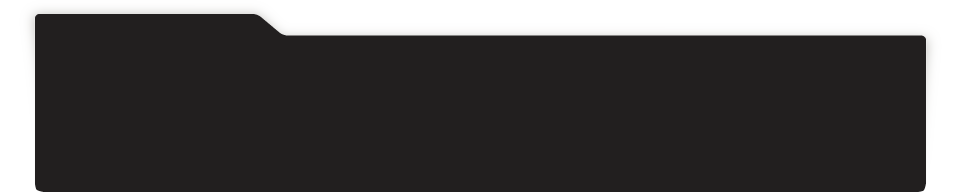
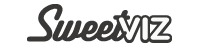
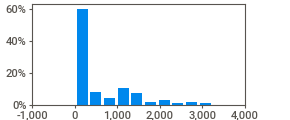
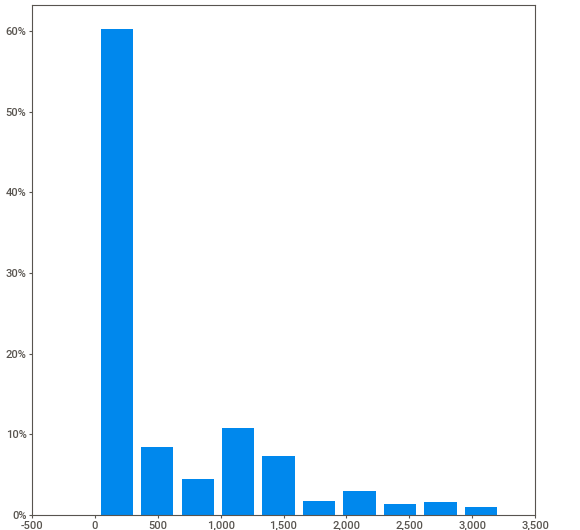
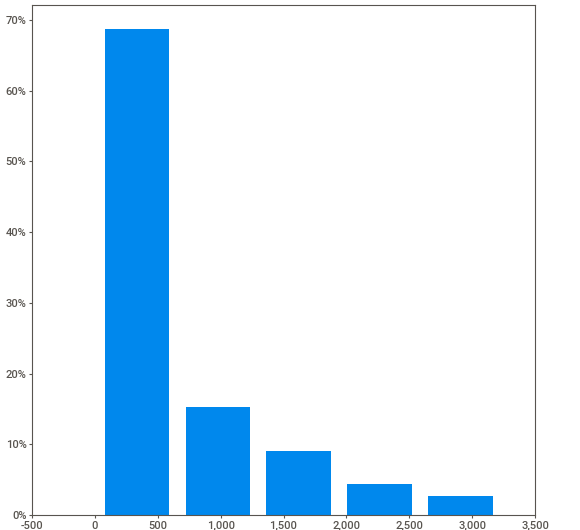
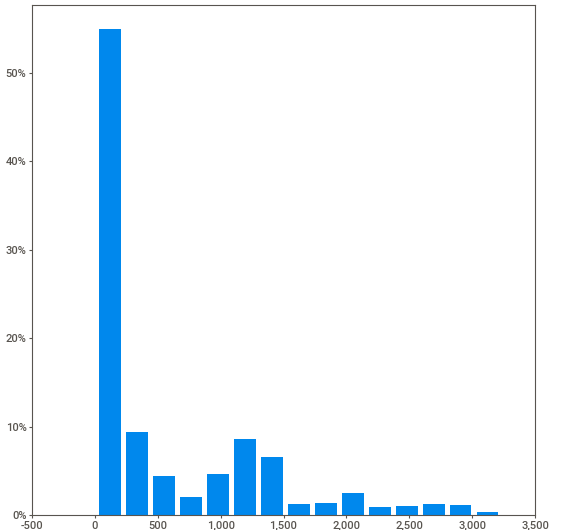
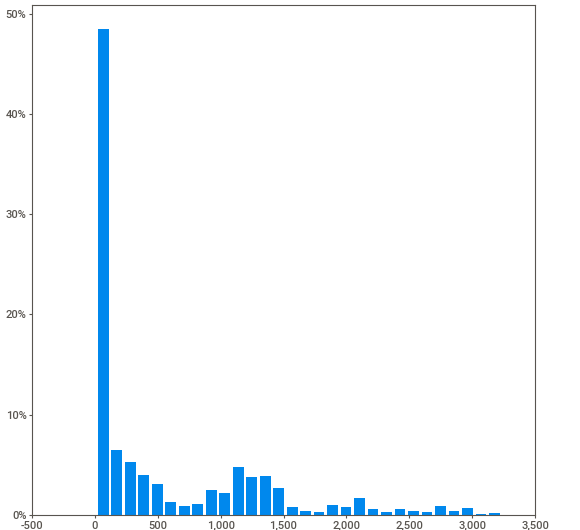
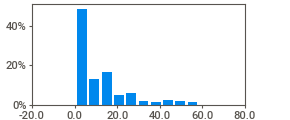
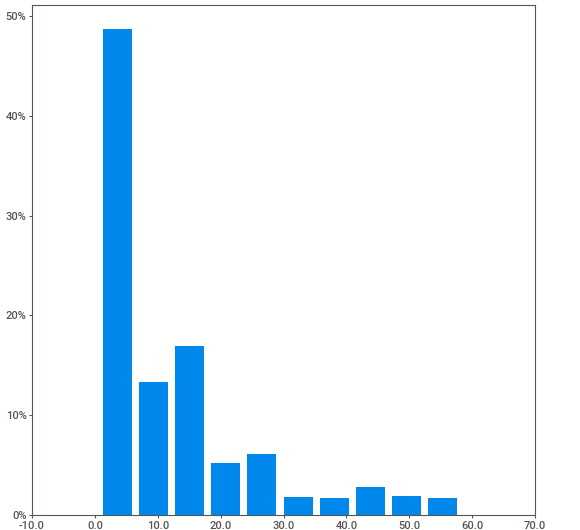
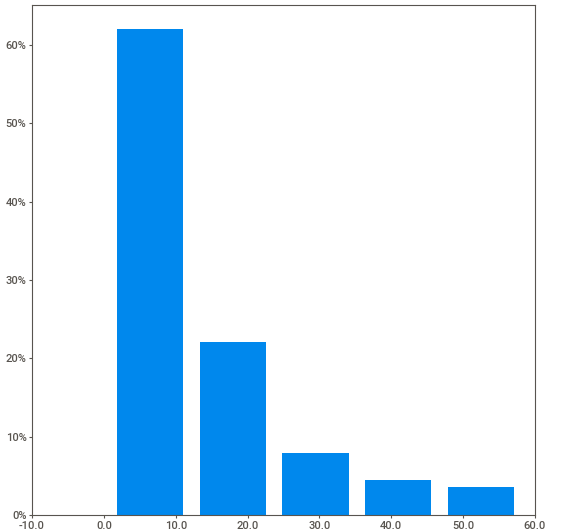
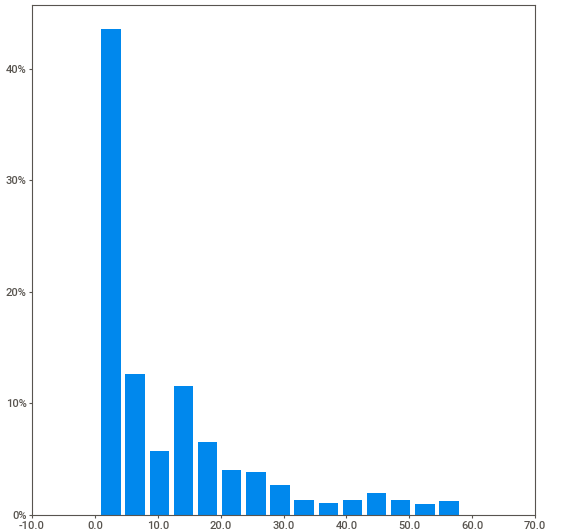
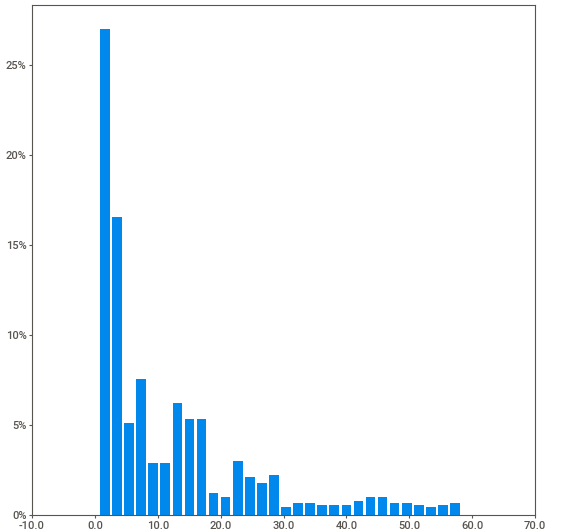
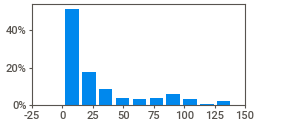
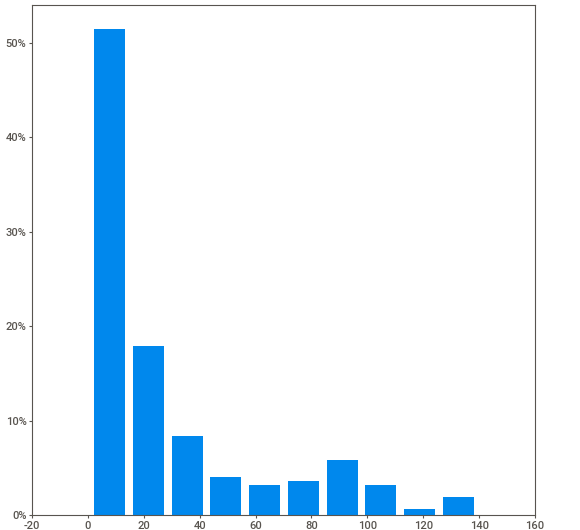
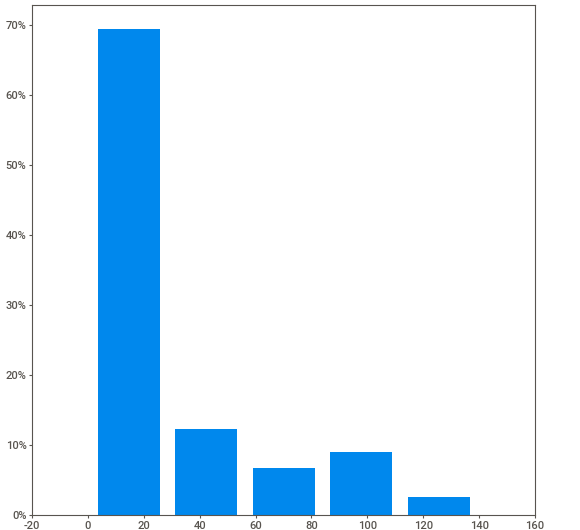
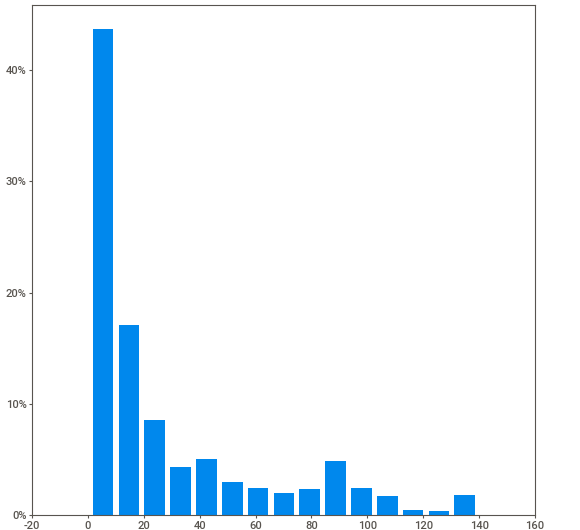
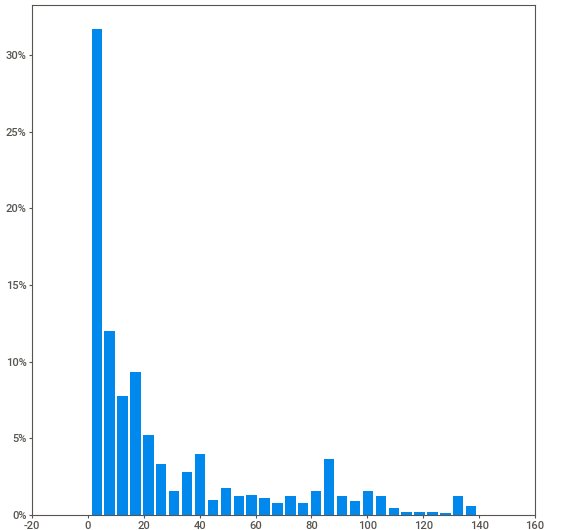
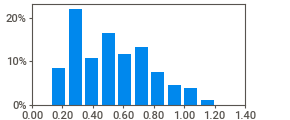
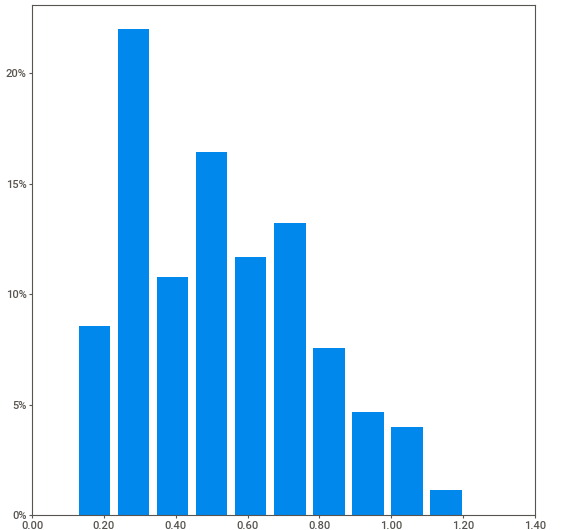
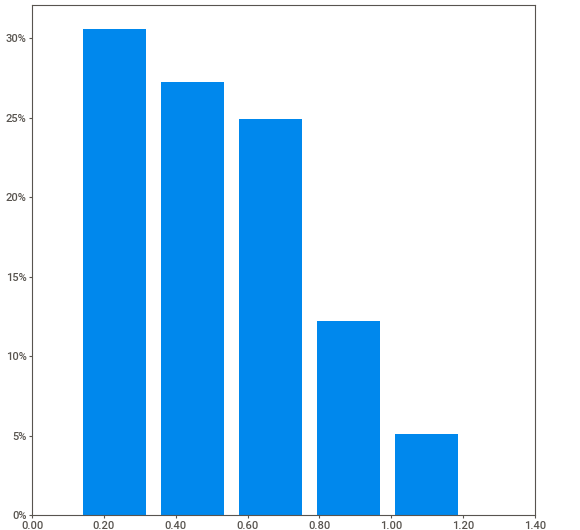
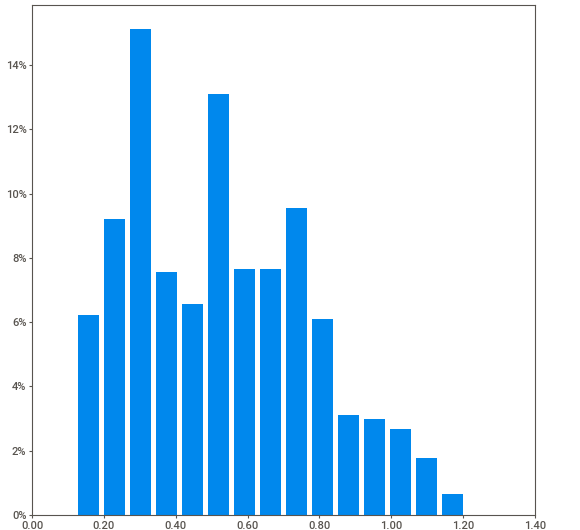
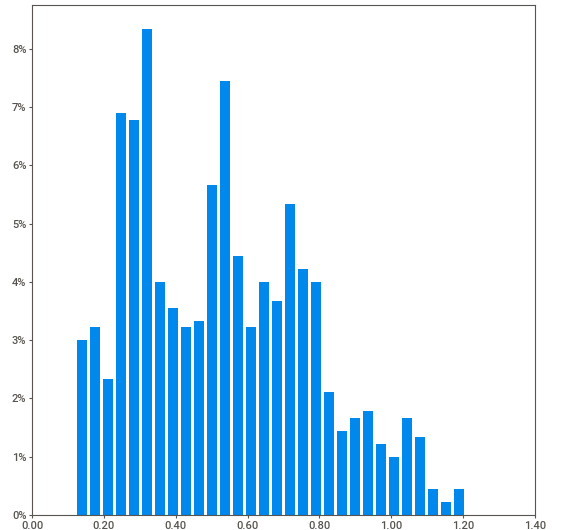
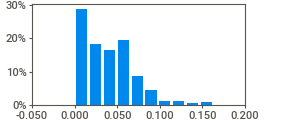
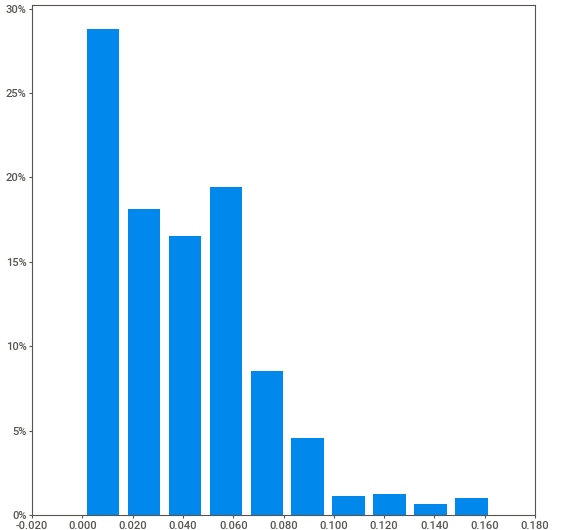
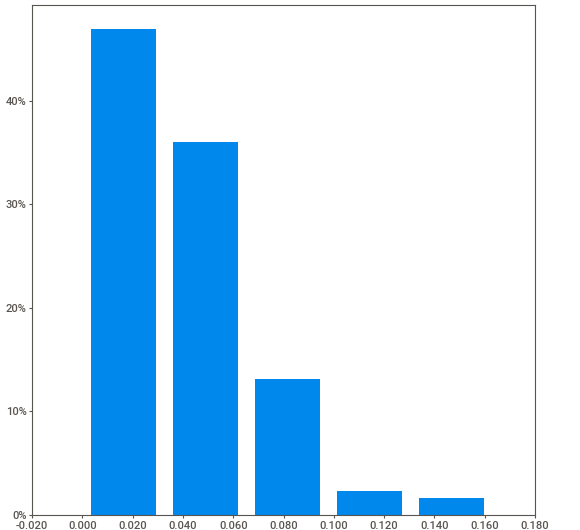
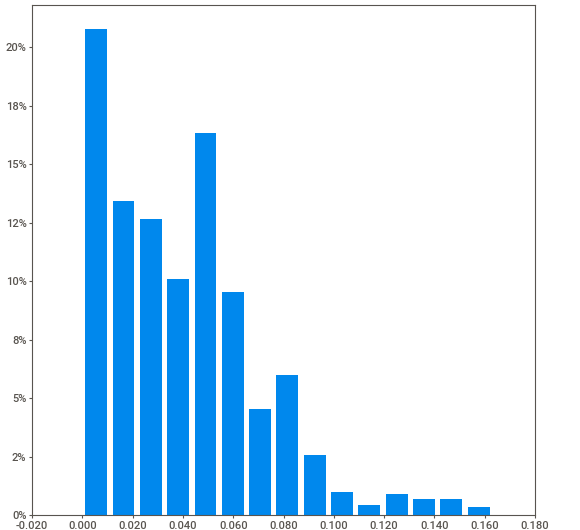
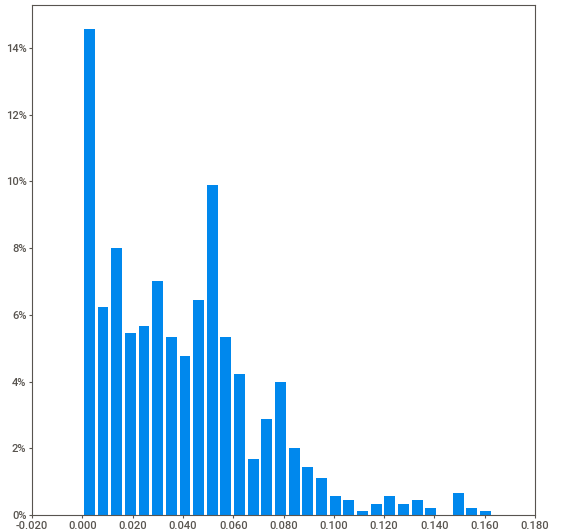
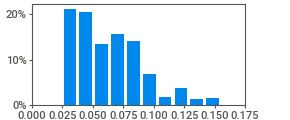
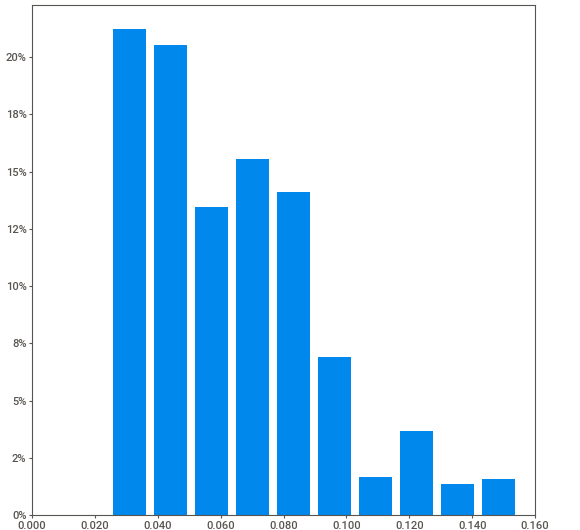
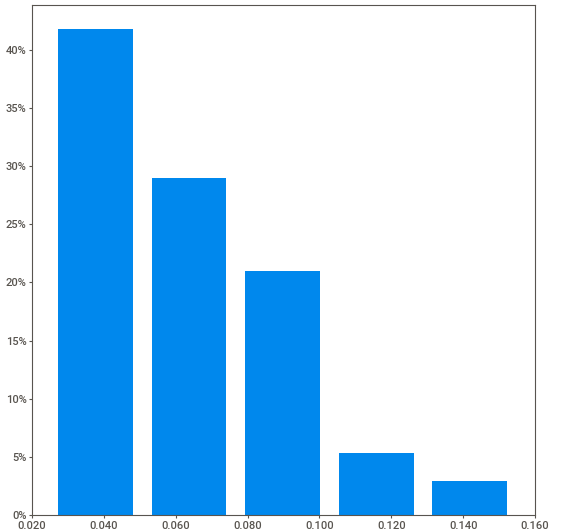
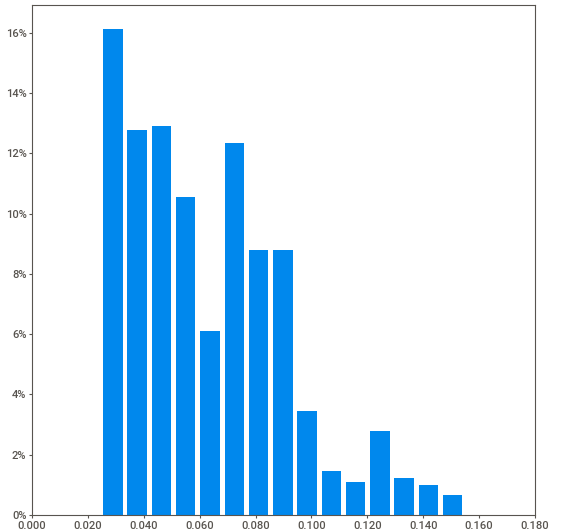
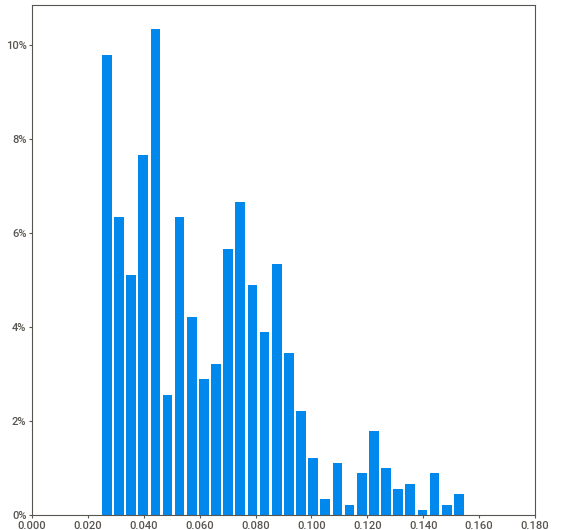
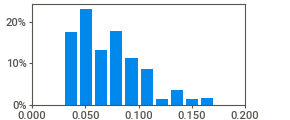
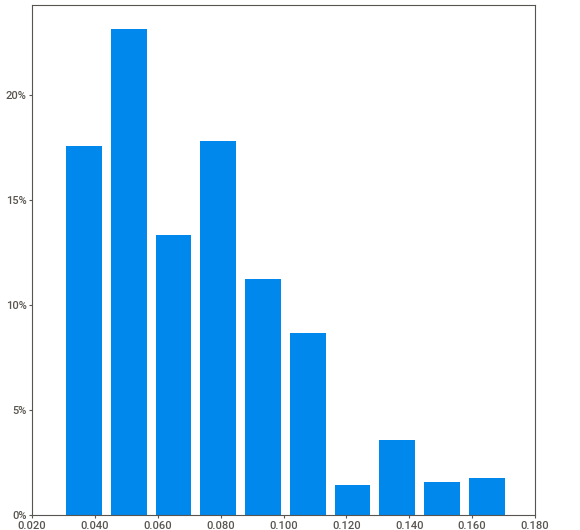
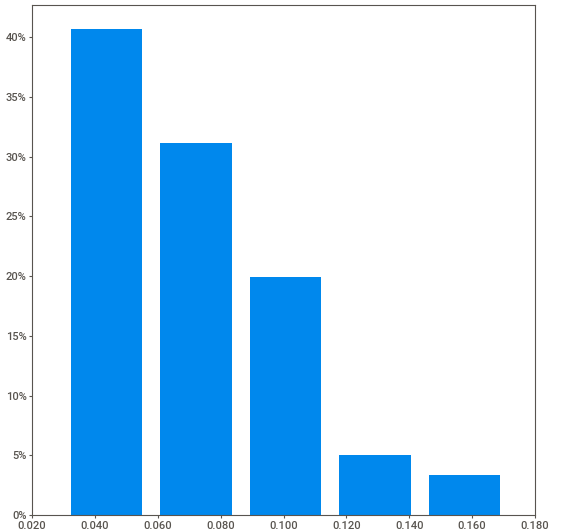
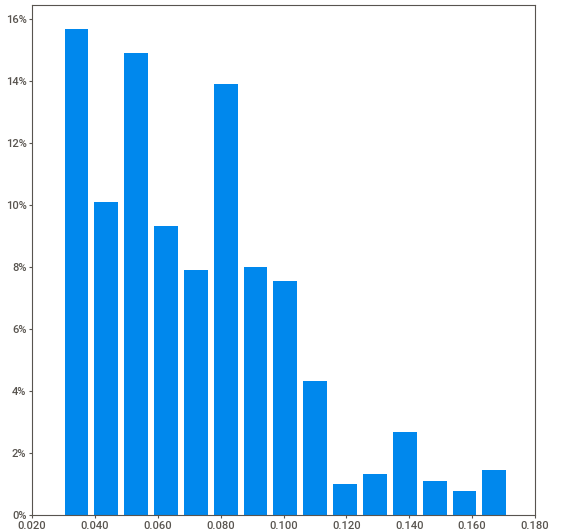
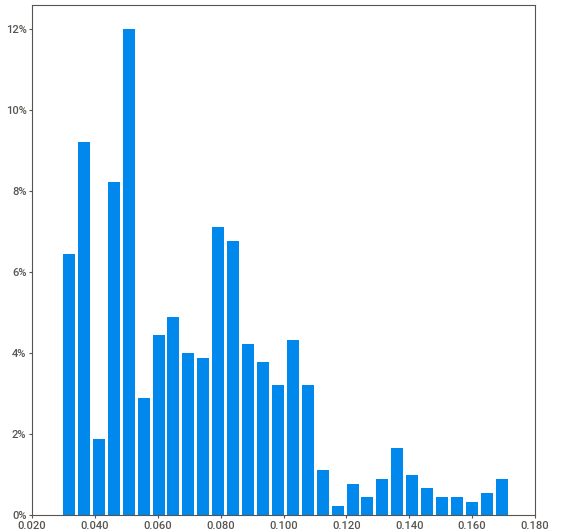
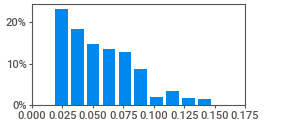
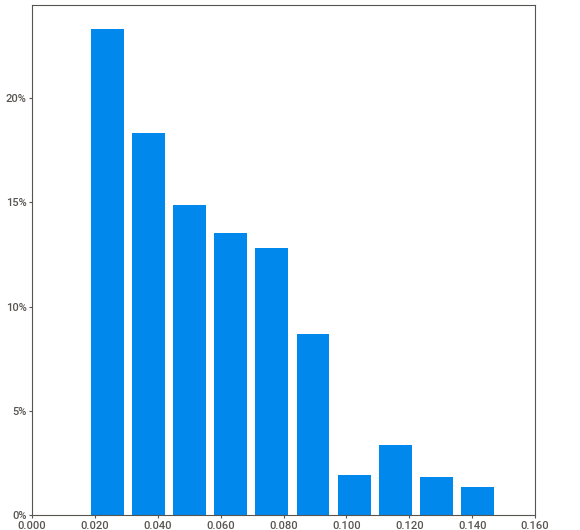
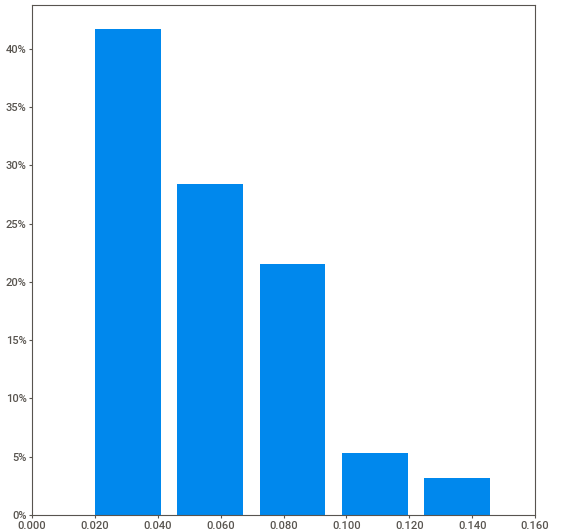
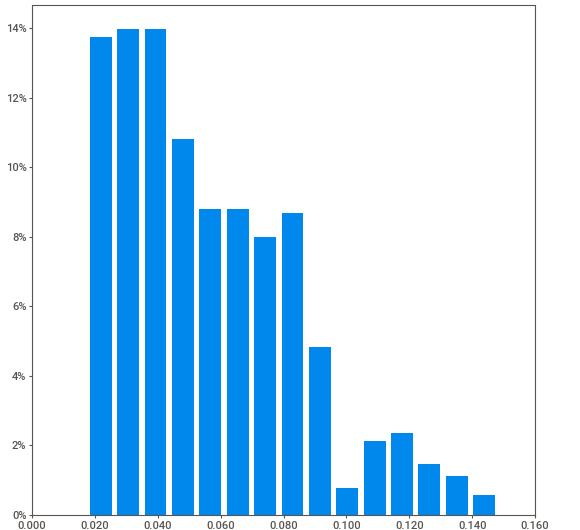
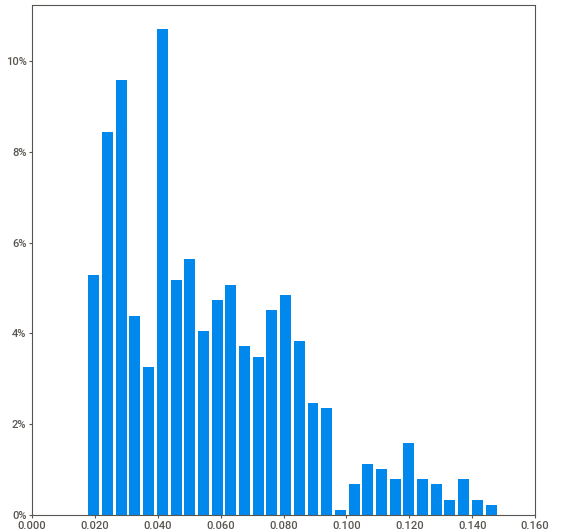
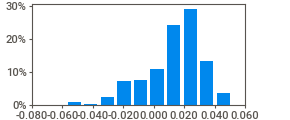
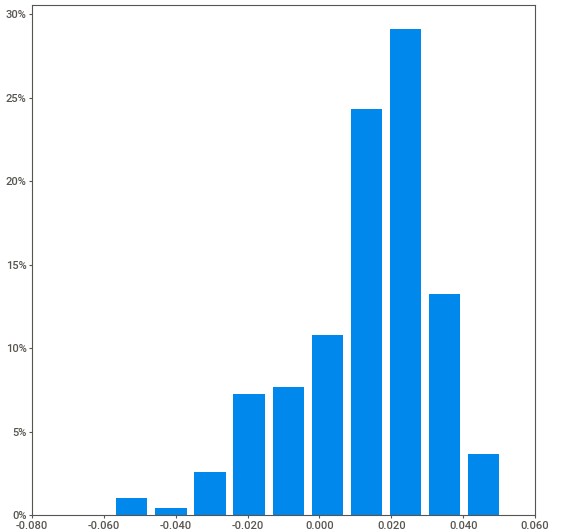
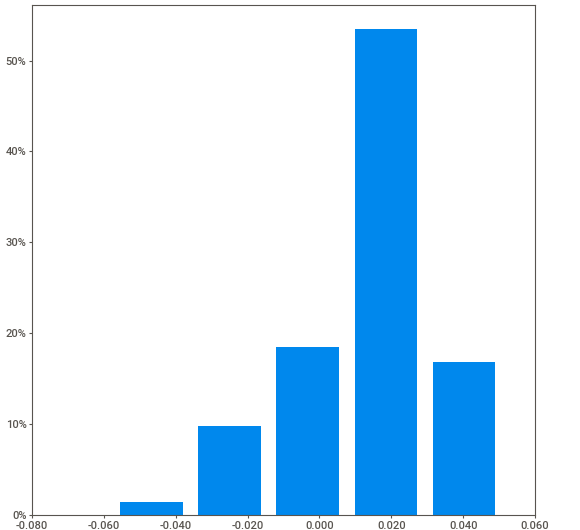
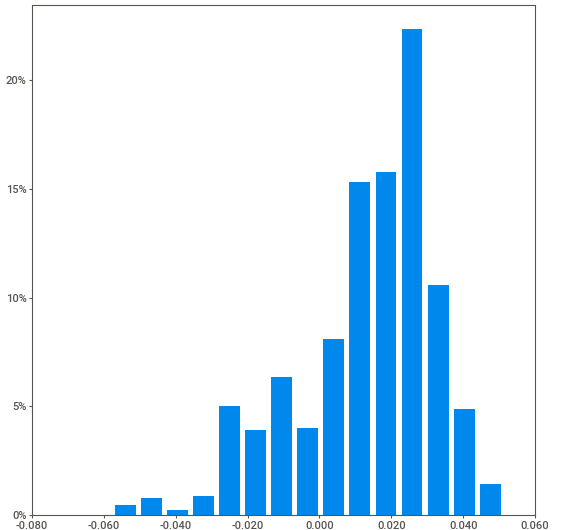
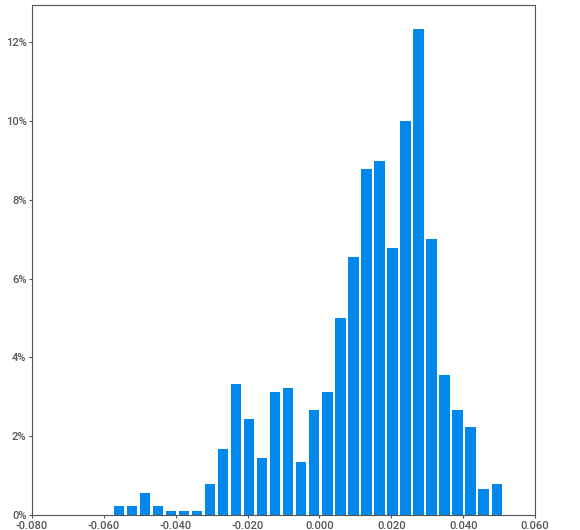
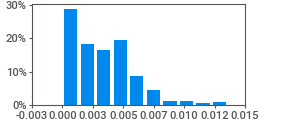
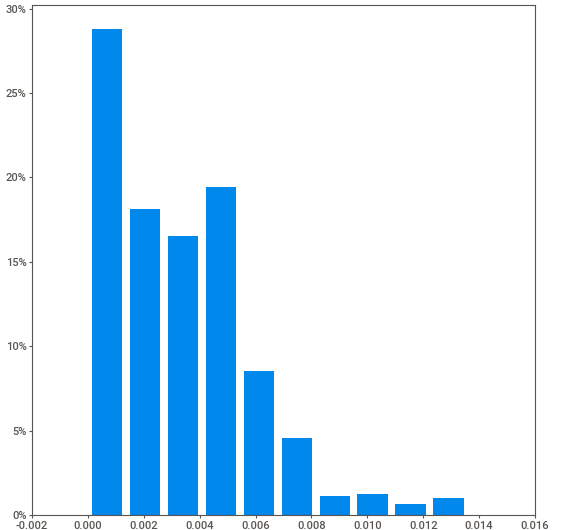
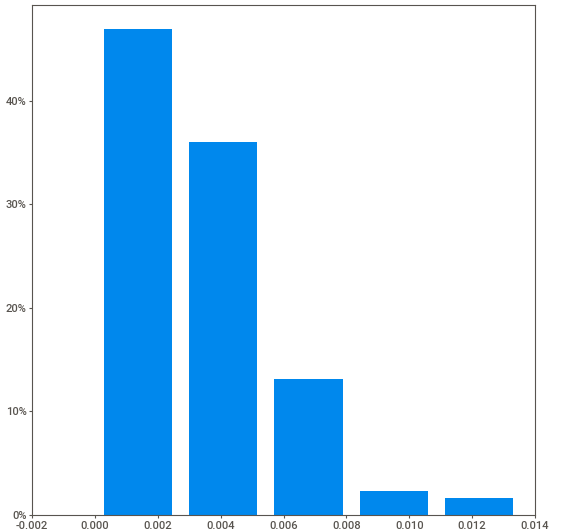
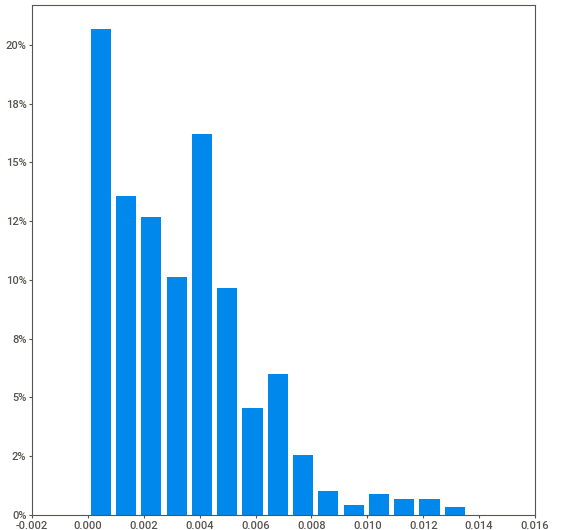
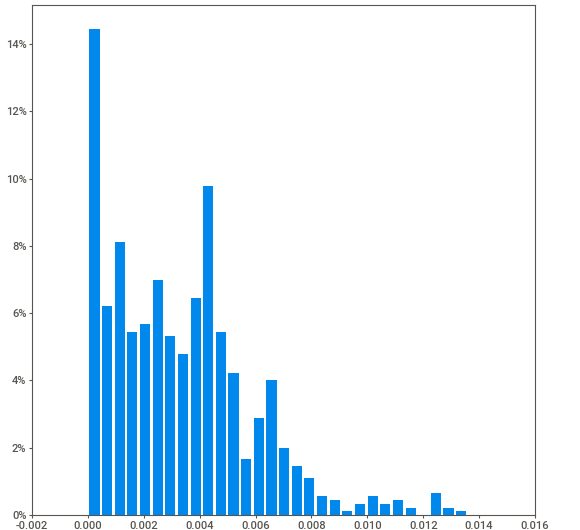
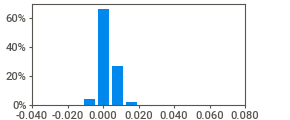
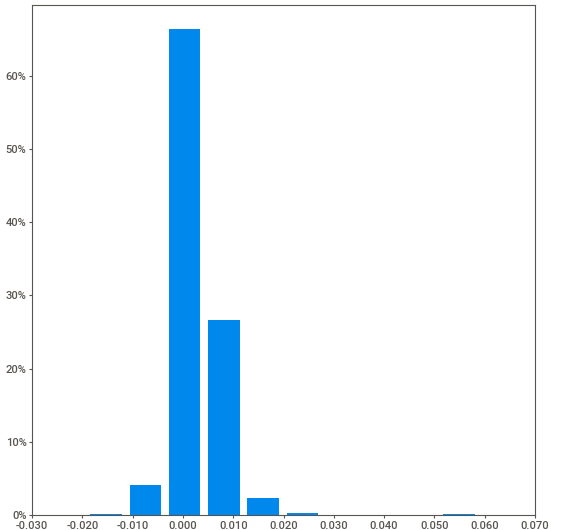
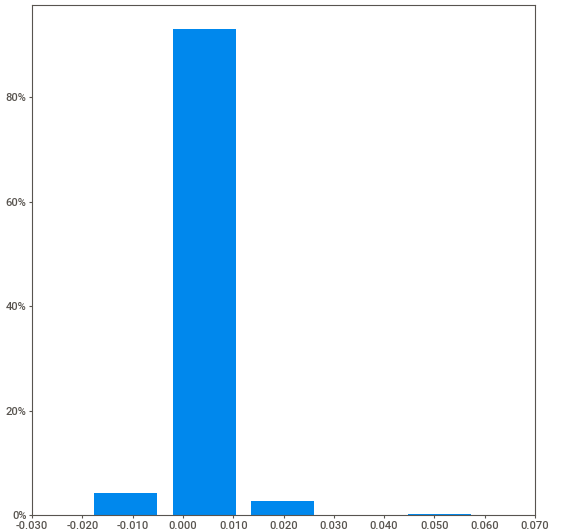
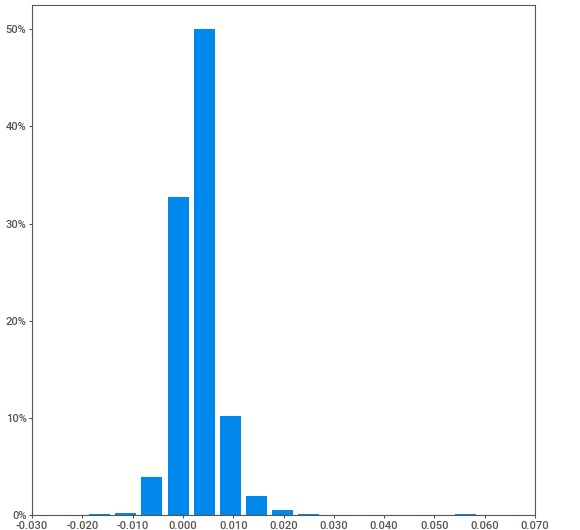
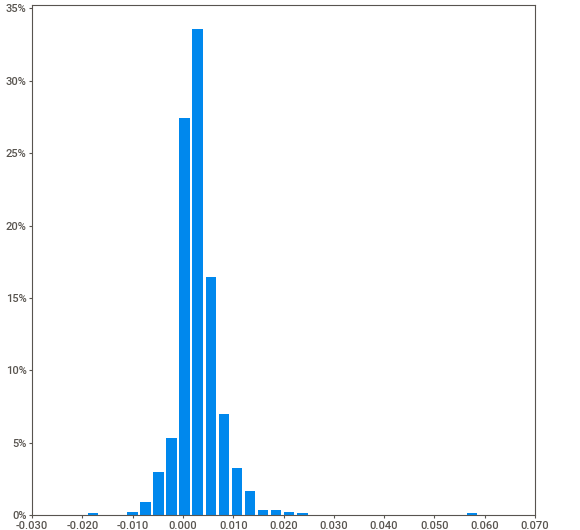
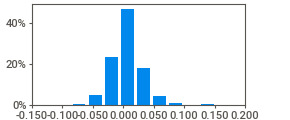
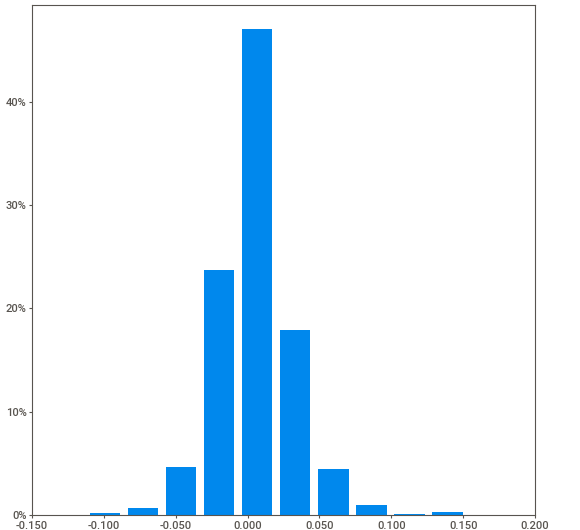
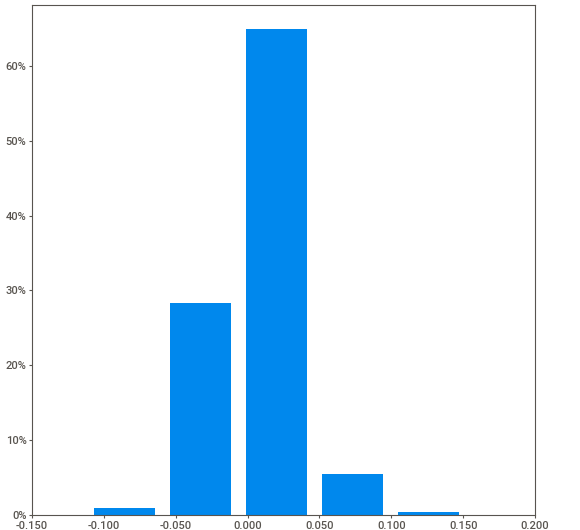
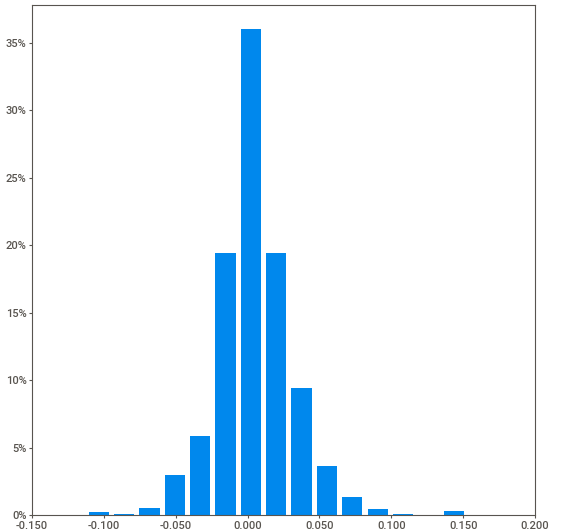
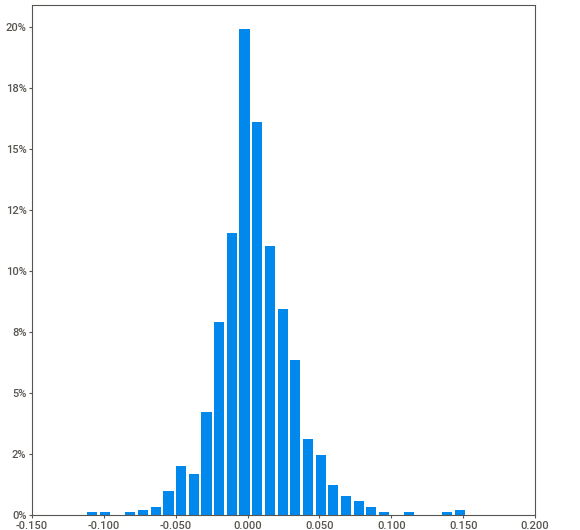
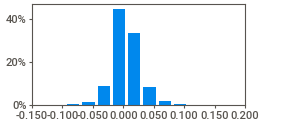
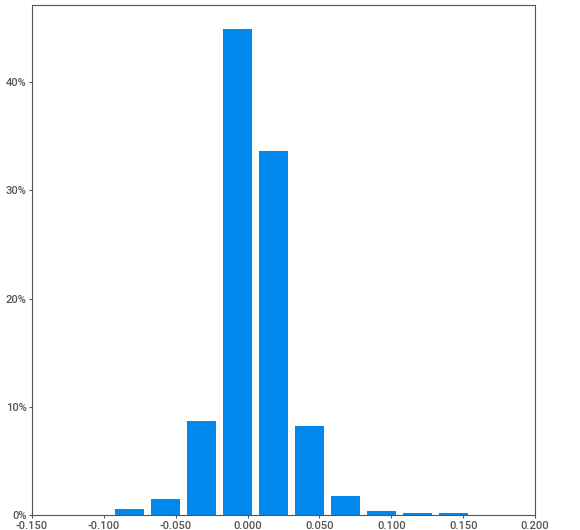
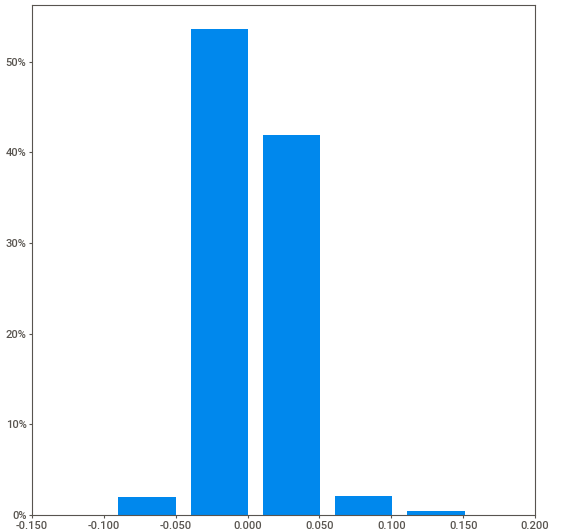
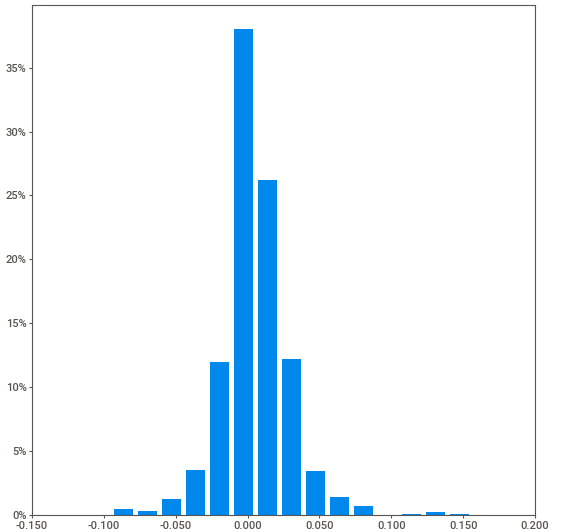
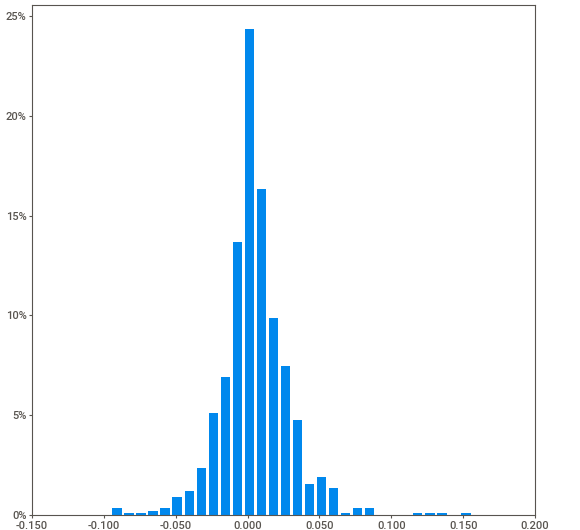
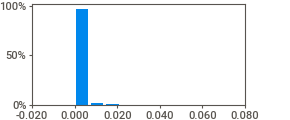
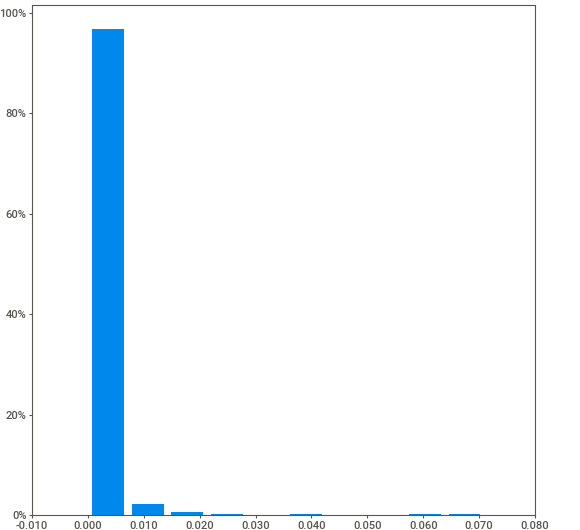
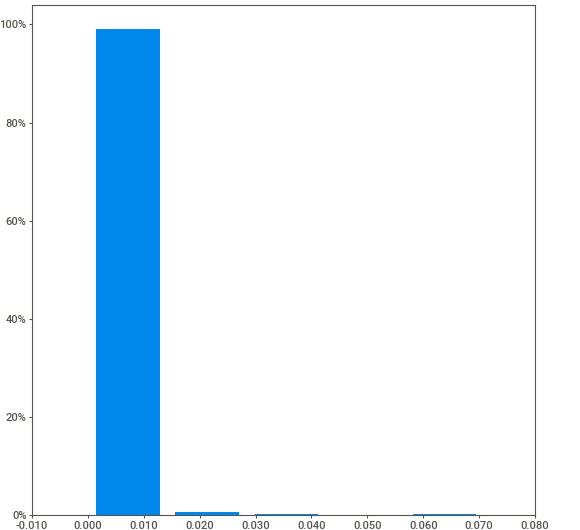
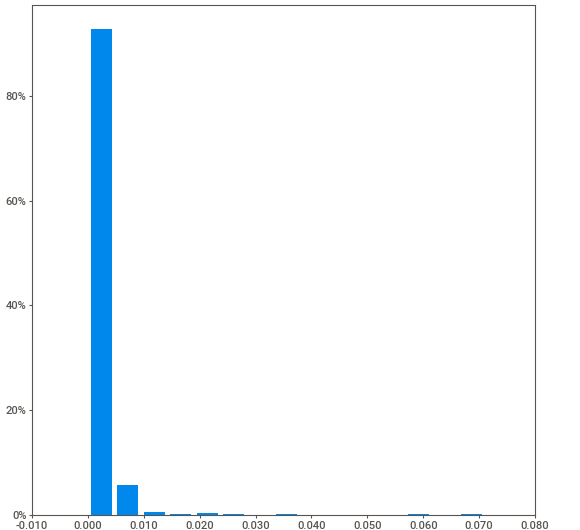
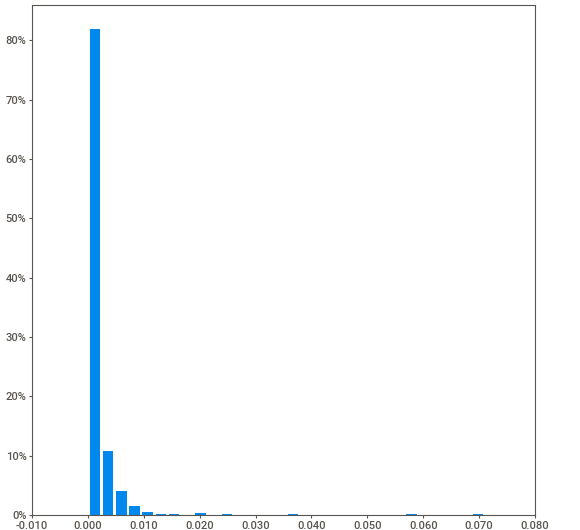
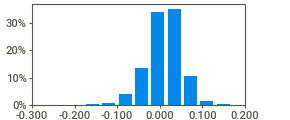
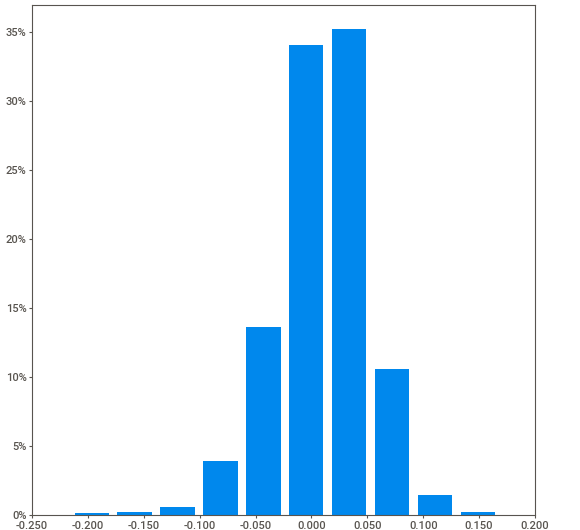
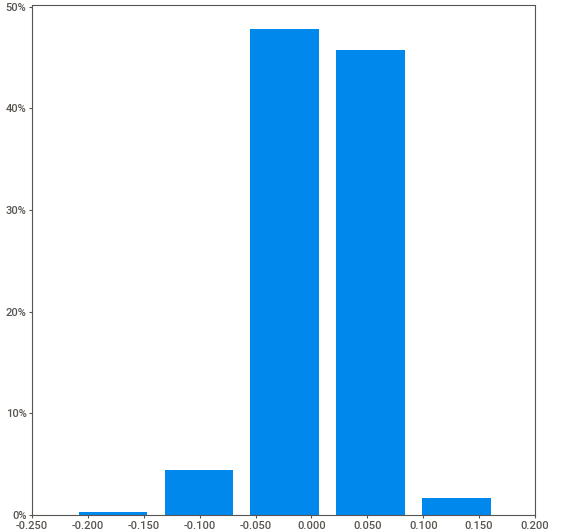
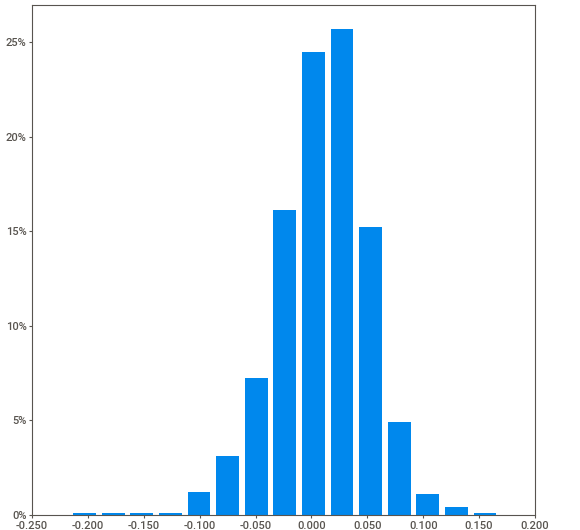
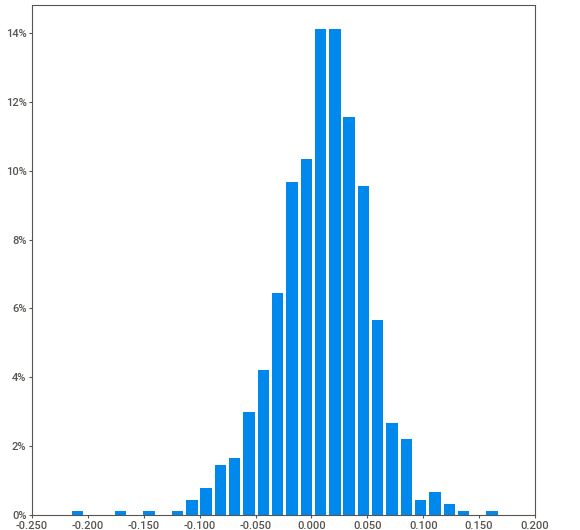
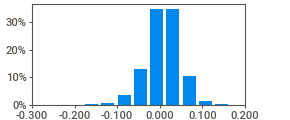
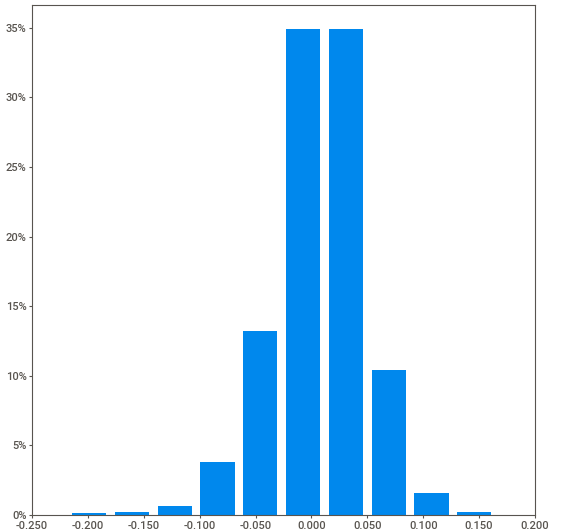
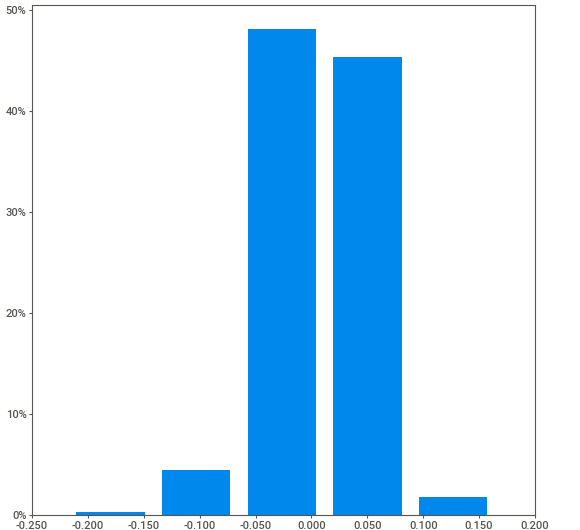
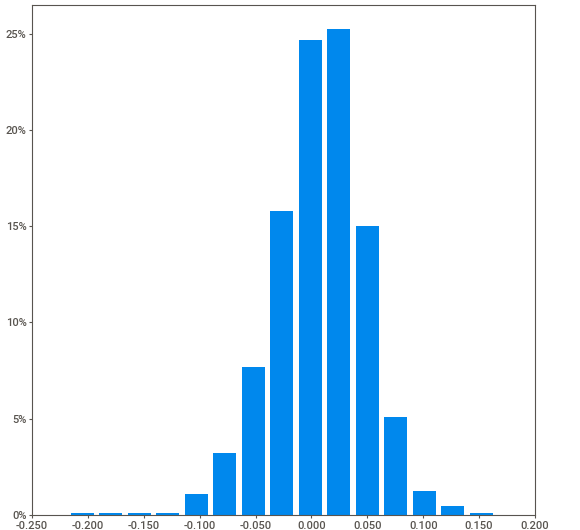
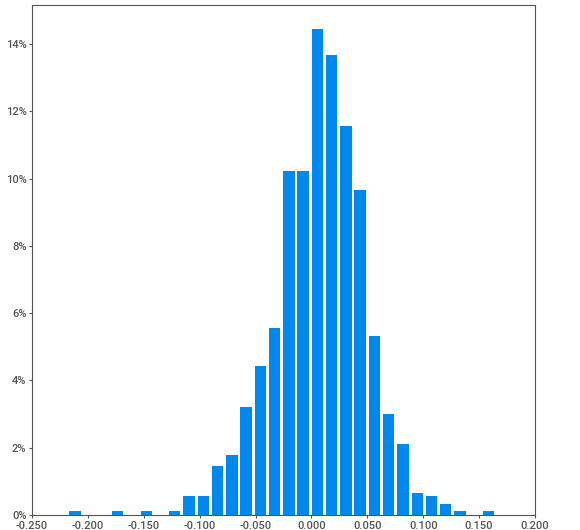
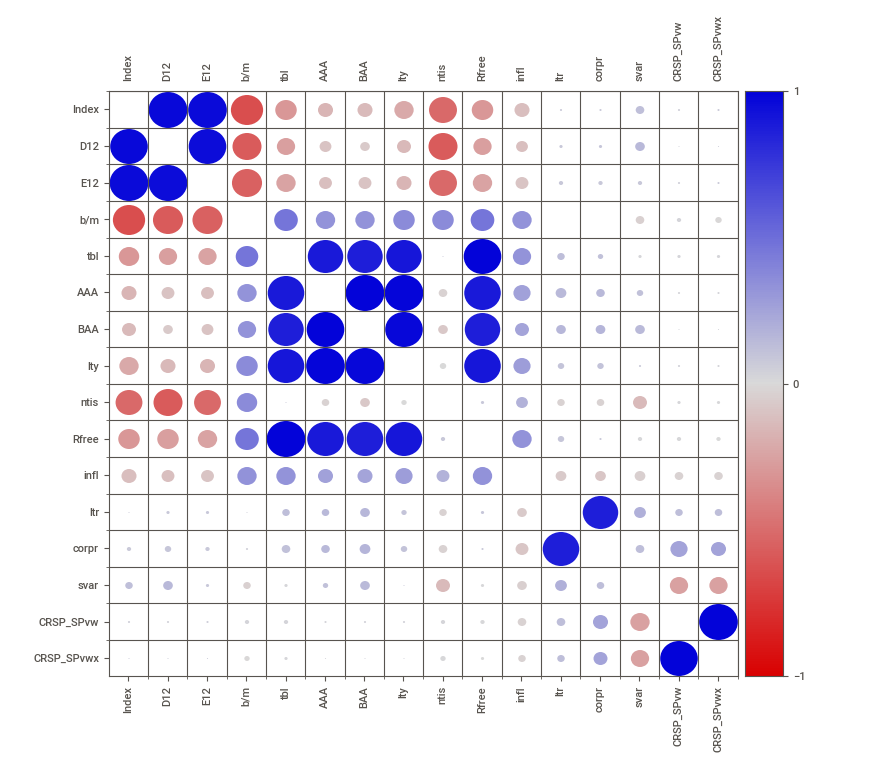
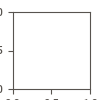

In [61]:
my_report = sv.analyze(df_processed)
my_report.show_notebook()


2. **Are there any features that are not stationary? If so, fractionally differentiate them.**

In [62]:
df_processed['Prev'] = df_processed['Index'].shift(-1)
df_processed['ret'] = np.log(df_processed['Prev']) - np.log(df_processed['Index']) - df_processed['Rfree']
indx = df_processed[df_processed.ret>0].index
df_processed.loc[indx, 'ret'] = 1
indx = df_processed[df_processed.ret<0].index
df_processed.loc[indx, 'ret'] = -1
# Remove flat data
df_processed = df_processed[df_processed.ret!=0]
df_processed['d/p'] = np.log(df_processed['D12']) - np.log(df_processed['Index'])
df_processed['d/y'] = np.log(df_processed['D12']) - np.log(df_processed['Prev'])
df_processed['e/p'] = np.log(df_processed['E12']) - np.log(df_processed['Index'])
df_processed['d/e'] = np.log(df_processed['D12']) - np.log(df_processed['E12'])
df_processed['tms'] = df_processed['lty'] - df_processed['tbl']
df_processed['dfy'] = df_processed['BAA'] - df_processed['AAA']
df_processed['dfr'] = df_processed['corpr'] - df_processed['ltr']
x_columns = ['d/p','d/y','e/p','d/e','e/p','d/e','svar','b/m','ntis','tbl','lty','ltr','tms','dfy','dfr','infl']
y_column = ['ret']
df_processed.dropna(inplace=True)
X_data = df_processed[x_columns]
Y_data = df_processed[y_column]

<ipython-input-62-d0824c7ef617>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['Prev'] = df_processed['Index'].shift(-1)
<ipython-input-62-d0824c7ef617>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['ret'] = np.log(df_processed['Prev']) - np.log(df_processed['Index']) - df_processed['Rfree']
<ipython-input-62-d0824c7ef617>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [63]:
print(X_data.shape)
X_data.head()

(888, 16)


d/p       d/y       e/p       d/e       e/p       d/e  \
yyyymm                                                                   
1945-01-01 -3.041558 -3.101352 -2.662340 -0.379217 -2.662340 -0.379217   
1945-02-01 -3.096183 -3.048930 -2.711553 -0.384631 -2.711553 -0.384631   
1945-03-01 -3.043790 -3.128109 -2.653829 -0.389961 -2.653829 -0.389961   
1945-04-01 -3.128109 -3.139500 -2.724355 -0.403754 -2.724355 -0.403754   
1945-05-01 -3.139500 -3.136163 -2.722139 -0.417360 -2.722139 -0.417360   

                svar       b/m      ntis     tbl     lty     ltr     tms  \
yyyymm                                                                     
1945-01-01  0.000924  0.735342  0.016454  0.0038  0.0240  0.0127  0.0202   
1945-02-01  0.000655  0.704489  0.014836  0.0038  0.0236  0.0077  0.0198   
1945-03-01  0.001887  0.767883  0.015963  0.0038  0.0236  0.0021  0.0198   
1945-04-01  0.001398  0.715063  0.015086  0.0038  0.0228  0.0160  0.0190   
1945-05-01  0.000921  0.702911  0.019773  0.0038  0.0226  0.0056  0.0188   

               dfy     dfr      infl  
yyyymm                                
1945-01-01  0.0077 -0.0051  0.000000  
1945-02-01  0.0076 -0.0031  0.000000  
1945-03-01  0.0076 -0.0003  0.000000  
1945-04-01  0.0075 -0.0142  0.000000  
1945-05-01  0.0070 -0.0067  0.005618

In [64]:
print(Y_data.shape)
Y_data.head()

(888, 1)


ret
yyyymm         
1945-01-01  1.0
1945-02-01 -1.0
1945-03-01  1.0
1945-04-01  1.0
1945-05-01 -1.0

In [65]:
type(Y_data)

pandas.core.frame.DataFrame

In [66]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [67]:
df_processed.head()

Index       D12       E12       b/m     tbl     AAA     BAA  \
yyyymm                                                                    
1945-01-01  13.47  0.643333  0.940000  0.735342  0.0038  0.0269  0.0346   
1945-02-01  14.30  0.646667  0.950000  0.704489  0.0038  0.0265  0.0341   
1945-03-01  13.64  0.650000  0.960000  0.767883  0.0038  0.0262  0.0338   
1945-04-01  14.84  0.650000  0.973333  0.715063  0.0038  0.0261  0.0336   
1945-05-01  15.01  0.650000  0.986667  0.702911  0.0038  0.0262  0.0332   

               lty      ntis     Rfree  ...  CRSP_SPvwx   Prev  ret       d/p  \
yyyymm                                  ...                                     
1945-01-01  0.0240  0.016454  0.000317  ...    0.010784  14.30  1.0 -3.041558   
1945-02-01  0.0236  0.014836  0.000317  ...    0.063578  13.64 -1.0 -3.096183   
1945-03-01  0.0236  0.015963  0.000317  ...   -0.044990  14.84  1.0 -3.043790   
1945-04-01  0.0228  0.015086  0.000317  ...    0.089465  15.01  1.0 -3.128109   
1945-05-01  0.0226  0.019773  0.000317  ...    0.011624  14.96 -1.0 -3.139500   

                 d/y       e/p       d/e     tms     dfy     dfr  
yyyymm                                                            
1945-01-01 -3.101352 -2.662340 -0.379217  0.0202  0.0077 -0.0051  
1945-02-01 -3.048930 -2.711553 -0.384631  0.0198  0.0076 -0.0031  
1945-03-01 -3.128109 -2.653829 -0.389961  0.0198  0.0076 -0.0003  
1945-04-01 -3.139500 -2.724355 -0.403754  0.0190  0.0075 -0.0142  
1945-05-01 -3.136163 -2.722139 -0.417360  0.0188  0.0070 -0.0067  

[5 rows x 25 columns]

In [68]:
X_dataset = df_processed.copy(deep=True)
X_dataset.head()

Index       D12       E12       b/m     tbl     AAA     BAA  \
yyyymm                                                                    
1945-01-01  13.47  0.643333  0.940000  0.735342  0.0038  0.0269  0.0346   
1945-02-01  14.30  0.646667  0.950000  0.704489  0.0038  0.0265  0.0341   
1945-03-01  13.64  0.650000  0.960000  0.767883  0.0038  0.0262  0.0338   
1945-04-01  14.84  0.650000  0.973333  0.715063  0.0038  0.0261  0.0336   
1945-05-01  15.01  0.650000  0.986667  0.702911  0.0038  0.0262  0.0332   

               lty      ntis     Rfree  ...  CRSP_SPvwx   Prev  ret       d/p  \
yyyymm                                  ...                                     
1945-01-01  0.0240  0.016454  0.000317  ...    0.010784  14.30  1.0 -3.041558   
1945-02-01  0.0236  0.014836  0.000317  ...    0.063578  13.64 -1.0 -3.096183   
1945-03-01  0.0236  0.015963  0.000317  ...   -0.044990  14.84  1.0 -3.043790   
1945-04-01  0.0228  0.015086  0.000317  ...    0.089465  15.01  1.0 -3.128109   
1945-05-01  0.0226  0.019773  0.000317  ...    0.011624  14.96 -1.0 -3.139500   

                 d/y       e/p       d/e     tms     dfy     dfr  
yyyymm                                                            
1945-01-01 -3.101352 -2.662340 -0.379217  0.0202  0.0077 -0.0051  
1945-02-01 -3.048930 -2.711553 -0.384631  0.0198  0.0076 -0.0031  
1945-03-01 -3.128109 -2.653829 -0.389961  0.0198  0.0076 -0.0003  
1945-04-01 -3.139500 -2.724355 -0.403754  0.0190  0.0075 -0.0142  
1945-05-01 -3.136163 -2.722139 -0.417360  0.0188  0.0070 -0.0067  

[5 rows x 25 columns]

In [69]:
X_dataset.columns

Index(['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
       'Rfree', 'infl', 'ltr', 'corpr', 'svar', 'CRSP_SPvw', 'CRSP_SPvwx',
       'Prev', 'ret', 'd/p', 'd/y', 'e/p', 'd/e', 'tms', 'dfy', 'dfr'],
      dtype='object')

In [70]:
X_data.head()

d/p       d/y       e/p       d/e       e/p       d/e  \
yyyymm                                                                   
1945-01-01 -3.041558 -3.101352 -2.662340 -0.379217 -2.662340 -0.379217   
1945-02-01 -3.096183 -3.048930 -2.711553 -0.384631 -2.711553 -0.384631   
1945-03-01 -3.043790 -3.128109 -2.653829 -0.389961 -2.653829 -0.389961   
1945-04-01 -3.128109 -3.139500 -2.724355 -0.403754 -2.724355 -0.403754   
1945-05-01 -3.139500 -3.136163 -2.722139 -0.417360 -2.722139 -0.417360   

                svar       b/m      ntis     tbl     lty     ltr     tms  \
yyyymm                                                                     
1945-01-01  0.000924  0.735342  0.016454  0.0038  0.0240  0.0127  0.0202   
1945-02-01  0.000655  0.704489  0.014836  0.0038  0.0236  0.0077  0.0198   
1945-03-01  0.001887  0.767883  0.015963  0.0038  0.0236  0.0021  0.0198   
1945-04-01  0.001398  0.715063  0.015086  0.0038  0.0228  0.0160  0.0190   
1945-05-01  0.000921  0.702911  0.019773  0.0038  0.0226  0.0056  0.0188   

               dfy     dfr      infl  
yyyymm                                
1945-01-01  0.0077 -0.0051  0.000000  
1945-02-01  0.0076 -0.0031  0.000000  
1945-03-01  0.0076 -0.0003  0.000000  
1945-04-01  0.0075 -0.0142  0.000000  
1945-05-01  0.0070 -0.0067  0.005618

In [71]:
X_dataset.drop(['Index', 'D12', 'E12', 'AAA', 'BAA',
'Rfree', 'CRSP_SPvw', 'CRSP_SPvwx',
'Prev', 'ret'], inplace=True, axis=1)
# x_columns = ['d/p','d/y','e/p','d/e','e/p','d/e','svar','b/m','ntis','tbl','lty','ltr','tms','dfy','dfr','infl']
X_dataset.head()

b/m     tbl     lty      ntis      infl     ltr   corpr  \
yyyymm                                                                     
1945-01-01  0.735342  0.0038  0.0240  0.016454  0.000000  0.0127  0.0076   
1945-02-01  0.704489  0.0038  0.0236  0.014836  0.000000  0.0077  0.0046   
1945-03-01  0.767883  0.0038  0.0236  0.015963  0.000000  0.0021  0.0018   
1945-04-01  0.715063  0.0038  0.0228  0.015086  0.000000  0.0160  0.0018   
1945-05-01  0.702911  0.0038  0.0226  0.019773  0.005618  0.0056 -0.0011   

                svar       d/p       d/y       e/p       d/e     tms     dfy  \
yyyymm                                                                         
1945-01-01  0.000924 -3.041558 -3.101352 -2.662340 -0.379217  0.0202  0.0077   
1945-02-01  0.000655 -3.096183 -3.048930 -2.711553 -0.384631  0.0198  0.0076   
1945-03-01  0.001887 -3.043790 -3.128109 -2.653829 -0.389961  0.0198  0.0076   
1945-04-01  0.001398 -3.128109 -3.139500 -2.724355 -0.403754  0.0190  0.0075   
1945-05-01  0.000921 -3.139500 -3.136163 -2.722139 -0.417360  0.0188  0.0070   

               dfr  
yyyymm              
1945-01-01 -0.0051  
1945-02-01 -0.0031  
1945-03-01 -0.0003  
1945-04-01 -0.0142  
1945-05-01 -0.0067

In [72]:
Y_dataset = df_processed.copy(deep=True)
Y_dataset.head()
Y_dataset.drop(['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
'Rfree', 'infl', 'ltr', 'corpr', 'svar', 'CRSP_SPvw', 'CRSP_SPvwx',
'Prev', 'd/p', 'd/y', 'e/p', 'd/e', 'tms', 'dfy', 'dfr'], inplace=True, axis=1)
Y_dataset.head()

ret
yyyymm         
1945-01-01  1.0
1945-02-01 -1.0
1945-03-01  1.0
1945-04-01  1.0
1945-05-01 -1.0

In [73]:
adfuller_stats = dict()
for i in X_dataset.columns:
  y=X_dataset.loc[:,i]
  results = adfuller(np.array(y), maxlag=1, regression='c', autolag=None)
  adfuller_stats[i] = results
for keys,values in adfuller_stats.items():
  print(keys)
  print(values)

b/m
(-1.5562366253061584, 0.5055314602821668, 1, 886, {'1%': -3.4377521975315783, '5%': -2.864807640843869, '10%': -2.568509921477307})
tbl
(-2.7576275093215568, 0.06458591600923247, 1, 886, {'1%': -3.4377521975315783, '5%': -2.864807640843869, '10%': -2.568509921477307})
lty
(-1.5565342384142686, 0.5053826576567452, 1, 886, {'1%': -3.4377521975315783, '5%': -2.864807640843869, '10%': -2.568509921477307})
ntis
(-2.985947156533011, 0.03622776337647685, 1, 886, {'1%': -3.4377521975315783, '5%': -2.864807640843869, '10%': -2.568509921477307})
infl
(-13.649652069529825, 1.5948444257098115e-25, 1, 886, {'1%': -3.4377521975315783, '5%': -2.864807640843869, '10%': -2.568509921477307})
ltr
(-21.98521445145029, 0.0, 1, 886, {'1%': -3.4377521975315783, '5%': -2.864807640843869, '10%': -2.568509921477307})
corpr
(-21.61803294200698, 0.0, 1, 886, {'1%': -3.4377521975315783, '5%': -2.864807640843869, '10%': -2.568509921477307})
svar
(-13.46582496243489, 3.458153196559784e-25, 1, 886, {'1%': -3.4377

**Solution:
We find the features b/m tbl lty ntis d/p d/y e/p do not follow stationarity with the Augmented Dickey-Fuller Test Lets explore the RF accuracy without Frac Diff**


In [74]:
import random
# random.seed(1)
np.random.seed(1)


In [75]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [76]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_dataset, Y_dataset, test_size=0.3) # 70% training and 30% test
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_trainpred = clf.predict(X_train)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print('The predictive stats on train data')
print("Accuracy:",metrics.accuracy_score(y_train, y_trainpred))
print("F1 SCORE:",metrics.f1_score(y_train,y_trainpred))
print("AUC score:",metrics.roc_auc_score(y_train,y_trainpred))
print("*"*15)
print('The predictive stats on test data')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 SCORE:",metrics.f1_score(y_test,y_pred))
print("AUC score:",metrics.roc_auc_score(y_test,y_pred))


<ipython-input-76-5a1a01e78804>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


The predictive stats on train data
Accuracy: 1.0
F1 SCORE: 1.0
AUC score: 1.0
***************
The predictive stats on test data
Accuracy: 0.5730337078651685
F1 SCORE: 0.6392405063291139
AUC score: 0.5581523632563001


**We will now fract Diff the non stationary features .**

In [77]:
# Fractional differntiation code snippets from Dr. Ernie P Chan and Dr. Roger Hunter
def getWeights_FFD(d,thres):
  w,k=[1.],1
  while True:
    w_=-w[-1]/k*(d-k+1)
    if abs(w_)<thres:break
    w.append(w_);k+=1
  return np.array(w[::-1]).reshape(-1,1)

def fracDiff_FFD(series,d,thres=1e-5):
  # Constant width window (new solution)
  w=getWeights_FFD(d,thres)
  df={}
  for name in series.columns:
    df_=pd.Series(series[name].values,index=series.index).fillna(method='ffill').dropna()
    x=pd.Series(0,index=df_.index)
    for k in range(w.shape[0]):
      x=x+w[k,0]*df_.shift(-k)
    #df[name]=x.dropna().copy(deep=True)
  df[name]=x.shift(k).copy(deep=True)
  df=pd.concat(df,axis=1)
  return df

def findMinD(series):
  for d in np.linspace(0,1,11):
    df_=fracDiff_FFD(series,d,thres=0.01).dropna()
    res=adfuller(df_.iloc[:,0].values,maxlag=1,regression='c',autolag=None)
    if (res[0]<=res[4]['5%']):
      return d
  return 1.0


In [78]:
X_dataset.head()

b/m     tbl     lty      ntis      infl     ltr   corpr  \
yyyymm                                                                     
1945-01-01  0.735342  0.0038  0.0240  0.016454  0.000000  0.0127  0.0076   
1945-02-01  0.704489  0.0038  0.0236  0.014836  0.000000  0.0077  0.0046   
1945-03-01  0.767883  0.0038  0.0236  0.015963  0.000000  0.0021  0.0018   
1945-04-01  0.715063  0.0038  0.0228  0.015086  0.000000  0.0160  0.0018   
1945-05-01  0.702911  0.0038  0.0226  0.019773  0.005618  0.0056 -0.0011   

                svar       d/p       d/y       e/p       d/e     tms     dfy  \
yyyymm                                                                         
1945-01-01  0.000924 -3.041558 -3.101352 -2.662340 -0.379217  0.0202  0.0077   
1945-02-01  0.000655 -3.096183 -3.048930 -2.711553 -0.384631  0.0198  0.0076   
1945-03-01  0.001887 -3.043790 -3.128109 -2.653829 -0.389961  0.0198  0.0076   
1945-04-01  0.001398 -3.128109 -3.139500 -2.724355 -0.403754  0.0190  0.0075   
1945-05-01  0.000921 -3.139500 -3.136163 -2.722139 -0.417360  0.0188  0.0070   

               dfr  
yyyymm              
1945-01-01 -0.0051  
1945-02-01 -0.0031  
1945-03-01 -0.0003  
1945-04-01 -0.0142  
1945-05-01 -0.0067

In [79]:
logbm=pd.DataFrame(np.log(X_dataset['b/m'])) # Must use log prices for FD
d_1=findMinD(logbm)
print("The min D is : {}".format(d_1))
logbm_FD=fracDiff_FFD(logbm,d_1,thres=0.01)

The min D is : 0.30000000000000004


In [80]:
logtbl=pd.DataFrame(np.log(X_dataset['tbl'])) # Must use log prices for FD
d_2=findMinD(logtbl)
print("The min D is : {}".format(d_2))
logtbl_FD=fracDiff_FFD(logtbl,d_2,thres=0.01)

The min D is : 0.2


In [81]:
X_dataset.isna().sum()

b/m      0
tbl      0
lty      0
ntis     0
infl     0
ltr      0
corpr    0
svar     0
d/p      0
d/y      0
e/p      0
d/e      0
tms      0
dfy      0
dfr      0
dtype: int64

In [82]:
loglty=pd.DataFrame(np.log(X_dataset['lty'])) # Must use log prices for FD
d_6=findMinD(loglty)
print("The min D is : {}".format(d_6))
loglty_FD=fracDiff_FFD(loglty,d_6,thres=0.01)

The min D is : 0.30000000000000004


In [83]:
# b/m tbl lty ntis d/p d/y e/p
X_dataset['b/m_FD'] = logbm_FD['b/m']
X_dataset['tbl_FD'] = logtbl_FD['tbl']
# X_data['ntis_FD'] = logntis_FD['ntis']
# X_data['d/p_FD'] = logdp_FD['d/p']
# X_data['d/y_FD'] = logdy_FD['d/y']
X_dataset['lty_FD'] = loglty_FD['lty']
# X_data['e/p_FD'] = logep_FD['e/p']
X_dataset.head()

b/m     tbl     lty      ntis      infl     ltr   corpr  \
yyyymm                                                                     
1945-01-01  0.735342  0.0038  0.0240  0.016454  0.000000  0.0127  0.0076   
1945-02-01  0.704489  0.0038  0.0236  0.014836  0.000000  0.0077  0.0046   
1945-03-01  0.767883  0.0038  0.0236  0.015963  0.000000  0.0021  0.0018   
1945-04-01  0.715063  0.0038  0.0228  0.015086  0.000000  0.0160  0.0018   
1945-05-01  0.702911  0.0038  0.0226  0.019773  0.005618  0.0056 -0.0011   

                svar       d/p       d/y       e/p       d/e     tms     dfy  \
yyyymm                                                                         
1945-01-01  0.000924 -3.041558 -3.101352 -2.662340 -0.379217  0.0202  0.0077   
1945-02-01  0.000655 -3.096183 -3.048930 -2.711553 -0.384631  0.0198  0.0076   
1945-03-01  0.001887 -3.043790 -3.128109 -2.653829 -0.389961  0.0198  0.0076   
1945-04-01  0.001398 -3.128109 -3.139500 -2.724355 -0.403754  0.0190  0.0075   
1945-05-01  0.000921 -3.139500 -3.136163 -2.722139 -0.417360  0.0188  0.0070   

               dfr  b/m_FD  tbl_FD  lty_FD  
yyyymm                                      
1945-01-01 -0.0051     NaN     NaN     NaN  
1945-02-01 -0.0031     NaN     NaN     NaN  
1945-03-01 -0.0003     NaN     NaN     NaN  
1945-04-01 -0.0142     NaN     NaN     NaN  
1945-05-01 -0.0067     NaN     NaN     NaN

In [84]:
X_processed = X_dataset.drop(['b/m','tbl','lty'],axis=1)

In [85]:
X_processed.head()

ntis      infl     ltr   corpr      svar       d/p       d/y  \
yyyymm                                                                         
1945-01-01  0.016454  0.000000  0.0127  0.0076  0.000924 -3.041558 -3.101352   
1945-02-01  0.014836  0.000000  0.0077  0.0046  0.000655 -3.096183 -3.048930   
1945-03-01  0.015963  0.000000  0.0021  0.0018  0.001887 -3.043790 -3.128109   
1945-04-01  0.015086  0.000000  0.0160  0.0018  0.001398 -3.128109 -3.139500   
1945-05-01  0.019773  0.005618  0.0056 -0.0011  0.000921 -3.139500 -3.136163   

                 e/p       d/e     tms     dfy     dfr  b/m_FD  tbl_FD  lty_FD  
yyyymm                                                                          
1945-01-01 -2.662340 -0.379217  0.0202  0.0077 -0.0051     NaN     NaN     NaN  
1945-02-01 -2.711553 -0.384631  0.0198  0.0076 -0.0031     NaN     NaN     NaN  
1945-03-01 -2.653829 -0.389961  0.0198  0.0076 -0.0003     NaN     NaN     NaN  
1945-04-01 -2.724355 -0.403754  0.0190  0.0075 -0.0142     NaN     NaN     NaN  
1945-05-01 -2.722139 -0.417360  0.0188  0.0070 -0.0067     NaN     NaN     NaN

In [86]:
# df.dropna()
X_processed.isna().sum().sum()

32

In [87]:
print("X shape is {} and Y shape is {}".format(X_processed.shape,Y_dataset.shape))


X shape is (888, 15) and Y shape is (888, 1)


**Dropping Nan values**

In [88]:
rows_with_nan = []
for index, row in X_processed.iterrows():
  is_nan_series = row.isnull()
  if is_nan_series.any():
    rows_with_nan.append(index)
print(rows_with_nan)

[Timestamp('1945-01-01 00:00:00'), Timestamp('1945-02-01 00:00:00'), Timestamp('1945-03-01 00:00:00'), Timestamp('1945-04-01 00:00:00'), Timestamp('1945-05-01 00:00:00'), Timestamp('1945-06-01 00:00:00'), Timestamp('1945-07-01 00:00:00'), Timestamp('1945-08-01 00:00:00'), Timestamp('1945-09-01 00:00:00'), Timestamp('1945-10-01 00:00:00'), Timestamp('1945-11-01 00:00:00')]


In [89]:
X_processed_final = X_processed.drop(rows_with_nan)
y_final = Y_dataset.drop(rows_with_nan)

In [90]:
print("X shape is {} and Y shape is {}".format(X_processed_final.shape,y_final.shape))

X shape is (877, 15) and Y shape is (877, 1)


In [91]:
X_processed_final.isna().sum().sum()

0

**3. Use first 2/3 of the data as train set, setting your random seed to 1, and train a random forest using Scikit-learn’s RandomForestClassifier using default hyperparameters.
What is the predictive accuracy, F1, and AUC score on the train set and the test set? (4 pt)**


Training the Random Forest with the fractionally differentiated feature columns.

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_processed_final, y_final, test_size=0.3) # 70% training and 30% test
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_trainpred = clf.predict(X_train)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print('The predictive stats on train data')
print("Accuracy:",metrics.accuracy_score(y_train, y_trainpred))
print("F1 SCORE:",metrics.f1_score(y_train,y_trainpred))
print("AUC score:",metrics.roc_auc_score(y_train,y_trainpred))
print("*"*15)
print('The predictive stats on test data')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 SCORE:",metrics.f1_score(y_test,y_pred))
print("AUC score:",metrics.roc_auc_score(y_test,y_pred))


<ipython-input-92-9b27aaa60c52>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


The predictive stats on train data
Accuracy: 1.0
F1 SCORE: 1.0
AUC score: 1.0
***************
The predictive stats on test data
Accuracy: 0.6439393939393939
F1 SCORE: 0.7044025157232704
AUC score: 0.6273453684522048


The training accuracy coming out as 100% shows the model has massively overfitted the dataset so we might need to do k fold cross validation here since we can see the actual performance our model is around 75% which was done with the unseen test dataset.

**4. Resetting the random seed to 1, use RandomizedSearchCV to apply hyperparameter optimization on the train set. Do they improve the 3 performance metrics computed in part 3) on the train and test sets? (4 pt)**

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
# from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, truncnorm, randint
# define model parameters here
model_params = {
# randomly sample numbers from 4 to 204 estimators
'n_estimators': randint(4,200),
# normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
# uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
'min_samples_split': uniform(0.01, 0.199)
}

In [94]:
# create random forest classifier model
rf_model = RandomForestClassifier()
# set up random search meta-estimator
# this will train 100 models over 5 folds of cross validation (500 models total)
clf = RandomizedSearchCV(rf_model, model_params, n_iter=100, cv=5, random_state=1)
# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(X_train, y_train.values.ravel())
# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.2809949264361146,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 0.15980488228194525,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 64,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [95]:
y_pred=model.predict(X_test)
y_trainpred = model.predict(X_train)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print('The predictive stats on train data')
print("Accuracy:",metrics.accuracy_score(y_train, y_trainpred))
print("F1 SCORE:",metrics.f1_score(y_train,y_trainpred))
print("AUC score:",metrics.roc_auc_score(y_train,y_trainpred))
print("*"*15)
print('The predictive stats on test data')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 SCORE:",metrics.f1_score(y_test,y_pred))
print("AUC score:",metrics.roc_auc_score(y_test,y_pred))

The predictive stats on train data
Accuracy: 0.6965742251223491
F1 SCORE: 0.7657430730478588
AUC score: 0.6704850004322642
***************
The predictive stats on test data
Accuracy: 0.6022727272727273
F1 SCORE: 0.7025495750708215
AUC score: 0.5605504587155963


In [96]:
X_processed_final.head()

ntis      infl     ltr   corpr      svar       d/p       d/y  \
yyyymm                                                                         
1945-12-01  0.025525  0.005525  0.0194  0.0133  0.001538 -3.269684 -3.337063   
1946-01-01  0.027969  0.000000  0.0025  0.0128  0.002645 -3.327012 -3.255014   
1946-02-01  0.031091 -0.005495  0.0032  0.0034  0.005942 -3.245065 -3.290322   
1946-03-01  0.031188  0.011050  0.0010  0.0034  0.001497 -3.280469 -3.317389   
1946-04-01  0.031307  0.005464 -0.0135 -0.0043  0.001078 -3.317389 -3.339531   

                 e/p       d/e     tms     dfy     dfr    b/m_FD   tbl_FD  \
yyyymm                                                                      
1945-12-01 -2.894991 -0.374693  0.0161  0.0049 -0.0061 -0.216009 -2.99635   
1946-01-01 -2.983423 -0.343589  0.0161  0.0047  0.0103 -0.264780 -2.99635   
1946-02-01 -2.932931 -0.312134  0.0160  0.0047  0.0002 -0.167204 -2.99635   
1946-03-01 -3.000167 -0.280302  0.0160  0.0047  0.0024 -0.190201 -2.99635   
1946-04-01 -3.059560 -0.257829  0.0169  0.0050  0.0092 -0.222940 -2.99635   

              lty_FD  
yyyymm                
1945-12-01 -1.507835  
1946-01-01 -1.486065  
1946-02-01 -1.481915  
1946-03-01 -1.474585  
1946-04-01 -1.425691

In [97]:
X_processed_final.to_csv('/content/S_P_mnthly_returns_input.csv')
y_final.to_csv('/content/S_P_mnthly_returns_output.csv')

**Solution**: There isnt much improvement on any parameter due to HyperParameter optimization as of yet

My initial attempt showed an an improved F1 score and Accuracy while AUC score didnt improve much after HyperParameter optimization. But this involved dataset from 1919 which i had taken initially but since I removed the datapoints before 1945 as Nancy suggested there werent any improvements. So for the first set of datapoints from 1919 we can state a good F1 score means that there are low false positives and low false negatives, so we are able to correctly identifying the profitable strategies which we were incorrectly leaving out in our Model(which wasnt optimized) and also able to reduce the chances of selecting the loss making strategies which were taken by our earlier model.

Also with the training dataset we are still massively overfitting the dataset which we need to apply some cross validation


In [98]:
X_dataset['ntis'].value_counts()

 0.016454    1
 0.029019    1
 0.040381    1
 0.043854    1
 0.045747    1
            ..
 0.034274    1
 0.034473    1
 0.035855    1
 0.035842    1
-0.019200    1
Name: ntis, Length: 888, dtype: int64

In [99]:
X_processed_final.head()

ntis      infl     ltr   corpr      svar       d/p       d/y  \
yyyymm                                                                         
1945-12-01  0.025525  0.005525  0.0194  0.0133  0.001538 -3.269684 -3.337063   
1946-01-01  0.027969  0.000000  0.0025  0.0128  0.002645 -3.327012 -3.255014   
1946-02-01  0.031091 -0.005495  0.0032  0.0034  0.005942 -3.245065 -3.290322   
1946-03-01  0.031188  0.011050  0.0010  0.0034  0.001497 -3.280469 -3.317389   
1946-04-01  0.031307  0.005464 -0.0135 -0.0043  0.001078 -3.317389 -3.339531   

                 e/p       d/e     tms     dfy     dfr    b/m_FD   tbl_FD  \
yyyymm                                                                      
1945-12-01 -2.894991 -0.374693  0.0161  0.0049 -0.0061 -0.216009 -2.99635   
1946-01-01 -2.983423 -0.343589  0.0161  0.0047  0.0103 -0.264780 -2.99635   
1946-02-01 -2.932931 -0.312134  0.0160  0.0047  0.0002 -0.167204 -2.99635   
1946-03-01 -3.000167 -0.280302  0.0160  0.0047  0.0024 -0.190201 -2.99635   
1946-04-01 -3.059560 -0.257829  0.0169  0.0050  0.0092 -0.222940 -2.99635   

              lty_FD  
yyyymm                
1945-12-01 -1.507835  
1946-01-01 -1.486065  
1946-02-01 -1.481915  
1946-03-01 -1.474585  
1946-04-01 -1.425691